## CREDIT CARD DEFAULT RISK ANALYSIS.

### PROBLEM STATEMENT :

### -  A Credit Card company needs to predict whether or not the customer will default, as well as recognise the factors that influence this probability and analyze the risk associated with the payment of credit card bills by customers.
#### Credit risk has traditionally been the greatest risk among all the risks that the banking and credit card industry are facing, and it is usually the one requiring the most capital. This can be proven by industry business reports and statistical data. Thus, assessing, detecting and managing default risk is the key factor in generating revenue and reducing loss for the banking and credit card industry.
#### “Credit risk management problems researched have been around credit scoring; it would go a long way to research how machine learning can be applied to quantitative areas for better computations of credit risk exposure by predicting probabilities of default.”

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# LOADING THE DATASET.(dc-original.)
dc=pd.read_csv('dataset.csv')
# To display all the columns in the dataset.
pd.set_option("display.max_columns",None)

## INFORMATION OF THE DATSET :

In [3]:
# Attribute Information:

# This research employed a binary variable, default payment (Yes = 1, No = 0),
# as the response variable. This study reviewed the literature
# and used the following 23 variables as explanatory variables: 

# X1: Amount of the given credit (NT dollar): 
# it includes both the individual consumer credit and his/her family (supplementary) credit. 
# X2: Gender (1 = male; 0 = female). 
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# X4: Marital status (1 = married; 2 = single; 3 = others). 
# X5: Age (year). 
# X6 - X11: History of past payment. We tracked the past monthly payment records 
# (from April to September, 2005) as follows: X6 = the repayment
      # status in September, 2005; X7 = the repayment status in August, 2005; . . .;
      # X11 = the repayment status in April, 2005. The measurement scale for
      # the repayment status is: m-1 = pay duly; 
      # m+1 = payment delay for one month; m+2 = payment delay for two months; . . .; 
      # m+8 = payment delay for eight months;
      # m+9 = payment delay for nine months and above. 
# X12-X17: Amount of bill statement (NT dollar). 
      # X12 = amount of bill statement in September, 2005; 
      # X13 = amount of bill statement in August, 2005;
      # . . .; X17 = amount of bill statement in April, 2005. 
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; 
      #  X19 = amount paid in August, 2005; . . .;
      #  X23 = amount paid in April, 2005.
# X24: Average of bill statements.
# X25: Average of previous payments.
# X26: will default next month payment.

In [4]:
dc.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'timeliness_1', 'timeliness_2', 'timeliness_3', 'timeliness_4',
       'timeliness_5', 'timeliness_6', 'balance_1', 'balance_2', 'balance_3',
       'balance_4', 'balance_5', 'balance_6', 'payment_1', 'payment_2',
       'payment_3', 'payment_4', 'payment_5', 'payment_6', 'avg_balance',
       'avg_payment', 'default'],
      dtype='object')

In [5]:
# A PEAK IN TO THE DATASET.
dc.sample(10)

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,timeliness_6,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default
7172,80000,female,hs,married,28,m+0,m+0,m+0,m+0,m+0,m-2,36847,38847,35017,36175,0,0,2000,2000,2000,0,0,0,24481.000000,1000.000000,no
24554,240000,male,grad,single,30,m+0,m+0,m+0,m+0,m+0,m+0,213483,216856,220514,217068,5886,11841,8008,10038,10029,1038,7000,0,147608.000000,6018.833333,no
23786,20000,female,hs,married,51,m+1,m+2,m+0,m+0,m+0,m+0,15399,14859,15913,17033,17466,19635,0,1600,1700,1000,2600,0,16717.500000,1150.000000,yes
15996,140000,female,grad,married,37,m+0,m+0,m+0,m+0,m+0,m+0,136431,135134,139178,139900,109665,108129,4849,6703,6120,4015,4042,4057,128072.833333,4964.333333,yes
29432,130000,male,uni,single,30,m-1,m+2,m+2,m+2,m-1,m-1,780,780,390,0,780,0,390,0,0,780,0,0,455.000000,195.000000,no
11704,30000,female,hs,married,22,m+1,m+2,m+0,m+0,m+4,m+4,21508,20881,23217,28498,28060,29999,0,3000,6000,1200,3000,0,25360.500000,2200.000000,yes
21978,230000,female,grad,single,27,m+0,m+0,m+0,m+0,m+0,m+0,145959,94798,70299,40299,33112,18009,3551,3000,1284,1000,1000,1000,67079.333333,1805.833333,no
9168,70000,female,hs,single,55,m+0,m+0,m+0,m+0,m+0,m+0,69997,41409,31450,29592,29703,19582,1700,3018,3338,3000,717,595,36955.500000,2061.333333,no
25174,30000,female,grad,single,21,m+1,m+2,m+0,m+0,m+0,m+0,33300,30920,31889,30278,26220,29968,0,2326,11406,524,6284,598,30429.166667,3523.000000,yes
1076,500000,male,grad,single,27,m+0,m+0,m+0,m+0,m+0,m+0,204198,201648,197549,192093,187726,183860,7434,6342,5276,5271,5778,5029,194512.333333,5855.000000,no


In [6]:
# DATASET HAS 30000 ROWS AND 26 COLUMNS.
print("NUMBER OF ROWS:",dc.shape[0],"\nNUMBER OF COLUMNS:",dc.shape[1])

NUMBER OF ROWS: 30000 
NUMBER OF COLUMNS: 26


In [7]:
# INFORMATION ABOUT DATASET.
dc.info()
# float64(2), int64(14), object(10) out of 26 columns.
# All the object columns needs encoding for the use of ML.
# 10 Categorical and 16 Continous features.
# Target is default.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit_limit    30000 non-null  int64  
 1   gender          30000 non-null  object 
 2   education       30000 non-null  object 
 3   marital_status  30000 non-null  object 
 4   age             30000 non-null  int64  
 5   timeliness_1    30000 non-null  object 
 6   timeliness_2    30000 non-null  object 
 7   timeliness_3    30000 non-null  object 
 8   timeliness_4    30000 non-null  object 
 9   timeliness_5    30000 non-null  object 
 10  timeliness_6    30000 non-null  object 
 11  balance_1       30000 non-null  int64  
 12  balance_2       30000 non-null  int64  
 13  balance_3       30000 non-null  int64  
 14  balance_4       30000 non-null  int64  
 15  balance_5       30000 non-null  int64  
 16  balance_6       30000 non-null  int64  
 17  payment_1       30000 non-null 

In [8]:
# CHECK FOR NULL AND MISSING VALUES IN EACH COLUMN.
display(dc.isnull().sum())
# There are no null and missing values in each columns of the dataset.
print("The Total Number of missing values from the entire dataset :",dc.isnull().sum().sum())
# There no null values in the entire dataset.

credit_limit      0
gender            0
education         0
marital_status    0
age               0
timeliness_1      0
timeliness_2      0
timeliness_3      0
timeliness_4      0
timeliness_5      0
timeliness_6      0
balance_1         0
balance_2         0
balance_3         0
balance_4         0
balance_5         0
balance_6         0
payment_1         0
payment_2         0
payment_3         0
payment_4         0
payment_5         0
payment_6         0
avg_balance       0
avg_payment       0
default           0
dtype: int64

The Total Number of missing values from the entire dataset : 0


In [9]:
# CATEGORICAL.
print("% VALUE COUNTS IN CATEGORICAL VARIABLES:\n")
print('******************************************************************')
for i in dc.select_dtypes(object).columns:
    print('NUMBER OF CATEGORIES IN  {} FEATURE IS: {}'.format(i,dc[i].nunique()))
    print(round(dc[i].value_counts(normalize=True)*100,2))
    print('******************************************************************')
# 60.37% of people in the dataset are female and remaining 39.63 are male.
# default is done by 22.12% and non-default is 77.88% of people in dataset.
# Marrried are 45.53%

% VALUE COUNTS IN CATEGORICAL VARIABLES:

******************************************************************
NUMBER OF CATEGORIES IN  gender FEATURE IS: 2
female    60.37
male      39.63
Name: gender, dtype: float64
******************************************************************
NUMBER OF CATEGORIES IN  education FEATURE IS: 7
uni       46.77
grad      35.28
hs        16.39
other2     0.93
other1     0.41
other3     0.17
0          0.05
Name: education, dtype: float64
******************************************************************
NUMBER OF CATEGORIES IN  marital_status FEATURE IS: 4
single     53.21
married    45.53
other       1.08
na          0.18
Name: marital_status, dtype: float64
******************************************************************
NUMBER OF CATEGORIES IN  timeliness_1 FEATURE IS: 11
m+0    49.12
m-1    18.95
m+1    12.29
m-2     9.20
m+2     8.89
m+3     1.07
m+4     0.25
m+5     0.09
m+8     0.06
m+6     0.04
m+7     0.03
Name: timeliness_1, dtype: float64


In [10]:
# NUMERICAL 
dc.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_limit,30000.0,167484.322667,129747.661567,10000.000000,50000.000000,140000.000000,240000.000000,1.000000e+06
age,30000.0,35.485500,9.217904,21.000000,28.000000,34.000000,41.000000,7.900000e+01
balance_1,30000.0,51223.330900,73635.860576,-165580.000000,3558.750000,22381.500000,67091.000000,9.645110e+05
balance_2,30000.0,49179.075167,71173.768783,-69777.000000,2984.750000,21200.000000,64006.250000,9.839310e+05
balance_3,30000.0,47013.154800,69349.387427,-157264.000000,2666.250000,20088.500000,60164.750000,1.664089e+06
balance_4,30000.0,43262.948967,64332.856134,-170000.000000,2326.750000,19052.000000,54506.000000,8.915860e+05
balance_5,30000.0,40311.400967,60797.155770,-81334.000000,1763.000000,18104.500000,50190.500000,9.271710e+05
balance_6,30000.0,38871.760400,59554.107537,-339603.000000,1256.000000,17071.000000,49198.250000,9.616640e+05
payment_1,30000.0,5663.580500,16563.280354,0.000000,1000.000000,2100.000000,5006.000000,8.735520e+05
payment_2,30000.0,5921.163500,23040.870402,0.000000,833.000000,2009.000000,5000.000000,1.684259e+06


In [11]:
# Maximum credit limit is 1000000.0000 dollars.
# Minimum credit limit is 10000.0000 dollars.
# Average credit limit is 167484.322667 dollars.
# Maximum age of person in dataset is 79.
# Minimum age of person in dataset is 21.
# Line of Credit has been given to persons aged  from  21 to 79 in the dataset.

In [12]:
# CATEGORICAL. 
dc.describe(include="object").T

,count,unique,top,freq
gender,30000,2,female,18112
education,30000,7,uni,14030
marital_status,30000,4,single,15964
timeliness_1,30000,11,m+0,14737
timeliness_2,30000,11,m+0,15730
timeliness_3,30000,11,m+0,15764
timeliness_4,30000,11,m+0,16455
timeliness_5,30000,10,m+0,16947
timeliness_6,30000,10,m+0,16286
default,30000,2,no,23364


In [13]:
# Most people i.e,18112 are female.
# Most people i.e, 14030 are university graduates.
# Maximum number of people are non-defaulters i.e, 23364.
# Maximum number of people are single i.e, 15964.
# Maximim have paid without and any delay in credit card payments(m+0).

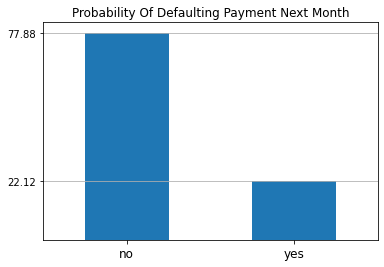

In [14]:
# DEFAULT 
dpt=dc.default.value_counts(normalize=True)*100
dpt.plot.bar();
plt.title("Probability Of Defaulting Payment Next Month");
plt.xticks(fontsize=12, rotation=0);
plt.yticks(dpt.values)
plt.grid(axis="y")
# NON DEFAULTERS ARE MAJORITY.
# DEFAULTERS ARE MINORITY.

## Treating values in features:

In [15]:
# For treating values in features.(dc-original,df-values treated )
df=dc.copy(deep=True)

In [16]:
df.head(1)

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,timeliness_6,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default
0,20000,female,uni,married,24,m+2,m+2,m-1,m-1,m-2,m-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1284.0,114.833333,yes


In [17]:
df['education'].replace(to_replace =["other1", "other2", "other3", "0"], value = "others", inplace=True)
df['education'].value_counts()

uni       14030
grad      10585
hs         4917
others      468
Name: education, dtype: int64

In [18]:
# "marital_status" na doesn't provide any information hence converting it to nan.
df['marital_status']=dc['marital_status'].replace('na',np.nan)
# % missing value in "marital_status" after converting na to nan.
df['marital_status'].isnull().mean()*100

0.18

In [19]:
df['marital_status'].fillna(df['marital_status'].mode()[0],inplace=True)

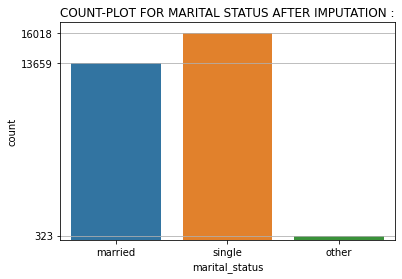

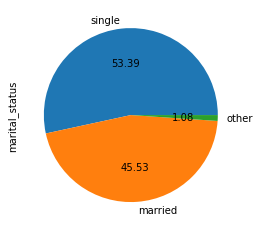

In [20]:
sns.countplot(df['marital_status']);
plt.title("COUNT-PLOT FOR MARITAL STATUS AFTER IMPUTATION :");
plt.yticks(df['marital_status'].value_counts().values)
plt.grid(axis="y")
plt.show()
df['marital_status'].value_counts().plot(kind="pie",autopct="%.2f");

## UNI-VARIATE ANALYSIS:

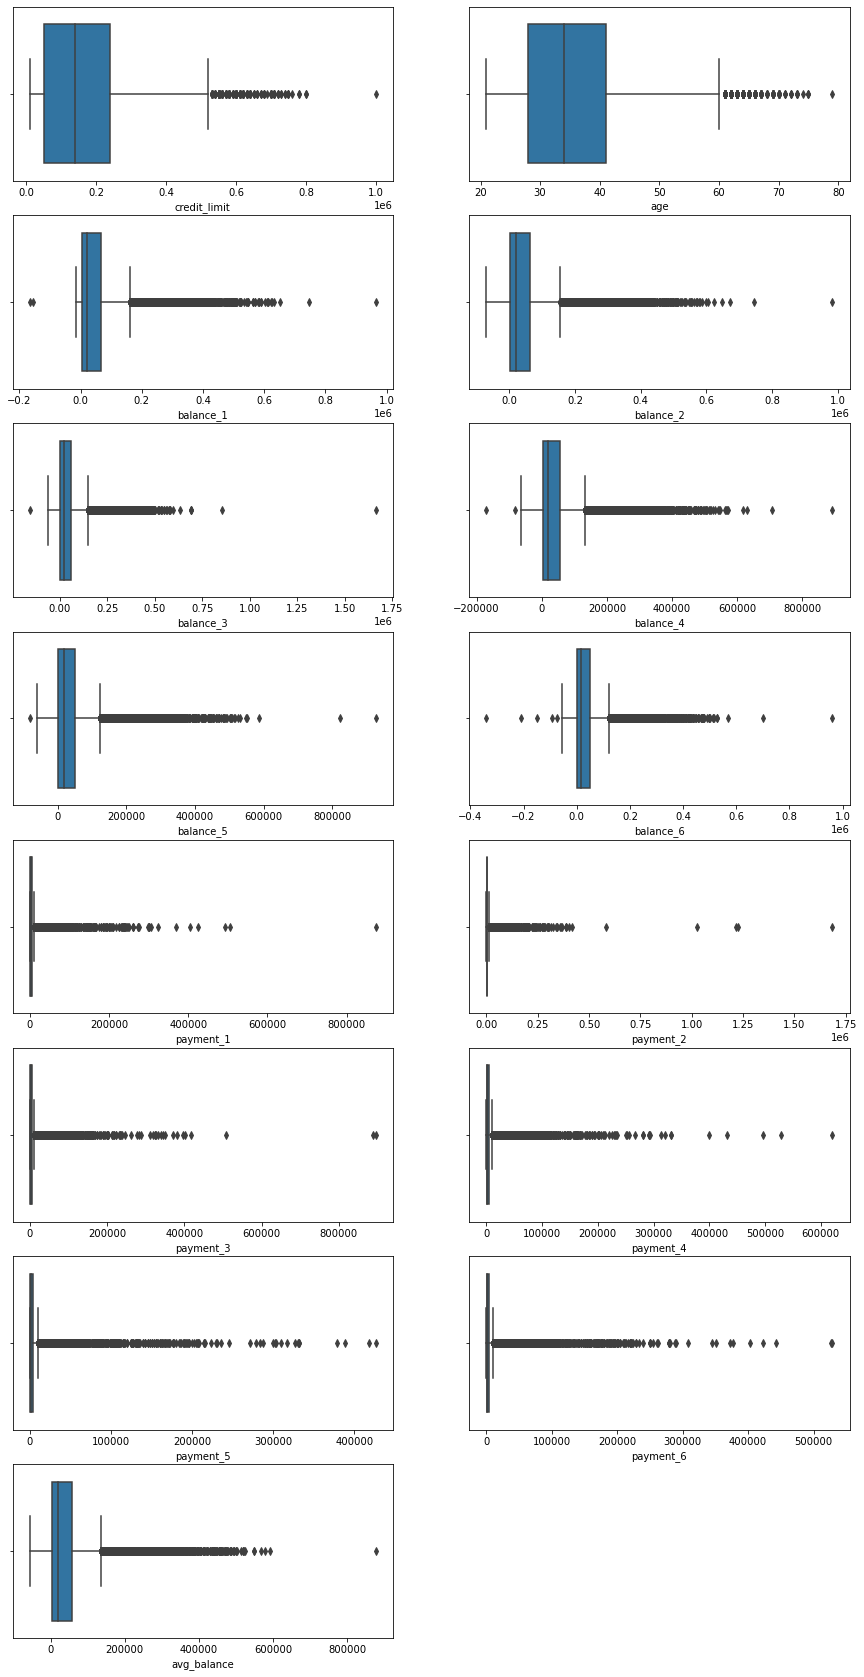

In [21]:
# CHECK FOR PRESENCE OF OUTLIERS.
plt.figure(figsize=(15,30))
for i,col in enumerate(df.select_dtypes(np.number).columns[0:-1],1):
    plt.subplot(8,2,i)
    sns.boxplot(df[col])
    plt.xlabel(col)
plt.show()

In [22]:
# THERE ARE OUTLIERS AND OUTLIERS IN EACH COLUMN GIVES INFORMATION 
# ABOUT MAXIMUM AMOUNT NEED TO BE PAID OR GIVEN BY THE LINE OF CREDIT
# HENCE, KEEPING THE OUTLIERS FOR THE MODEL
# AS IT CONTAINS NEEDED INFORMATION FOR THE ACCURATE PREDICTION FOR ALL KINDS OF PEOPLE.

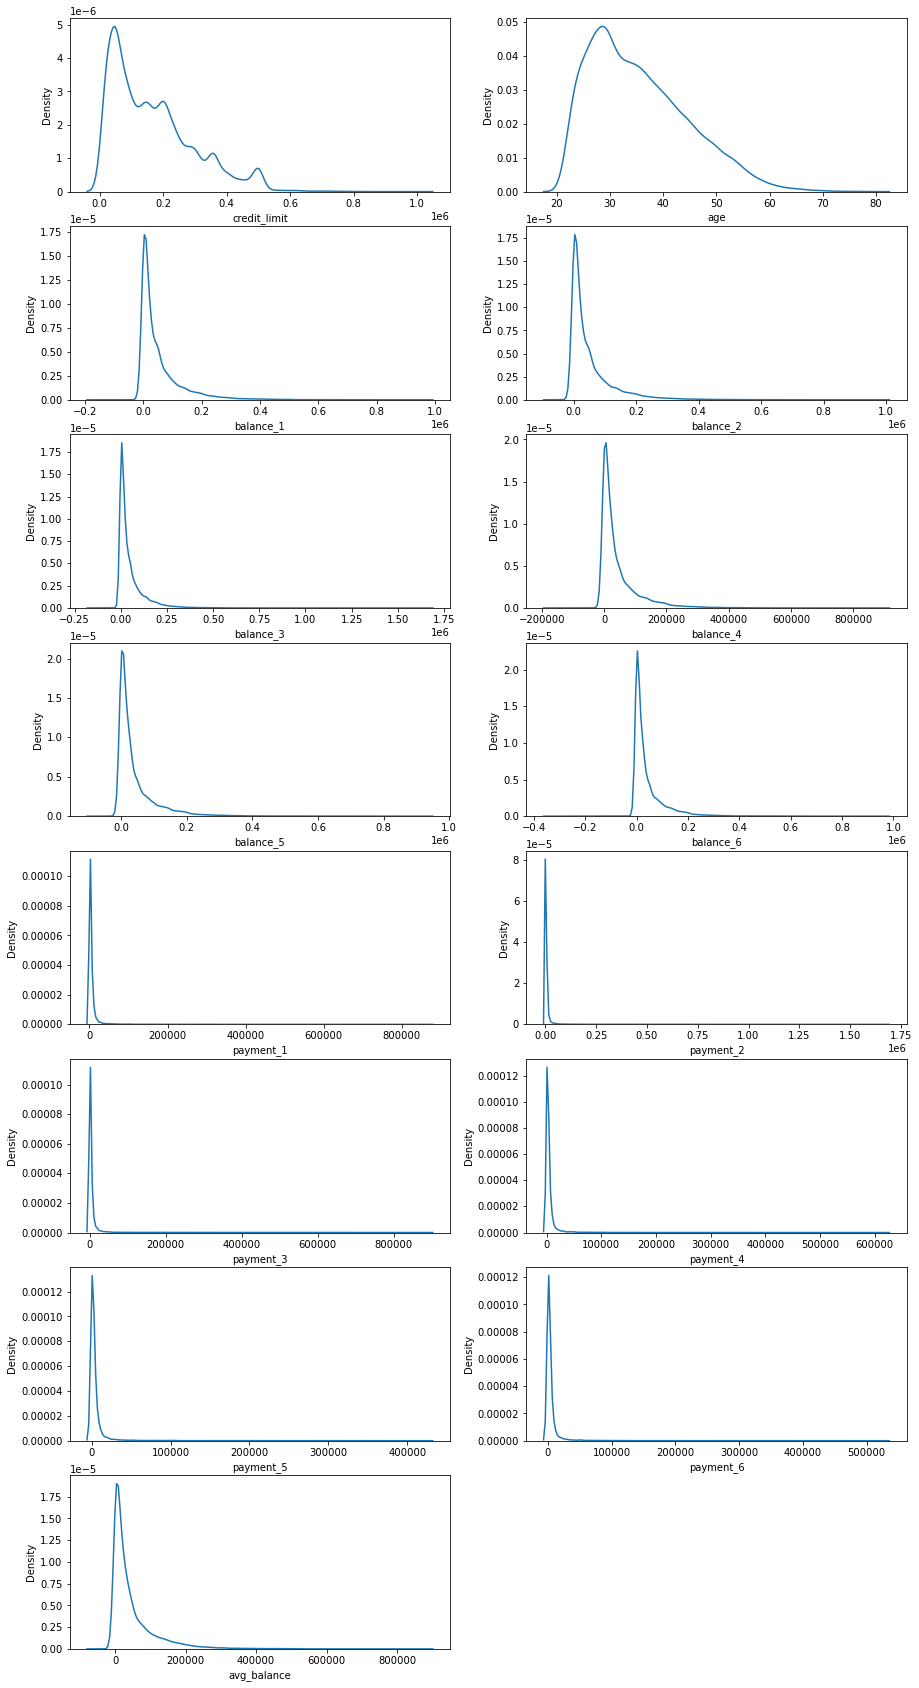

In [23]:
# CHECK FOR NORMAL DISTRIBUTION.
plt.figure(figsize=(15,30))
for i,col in enumerate(df.select_dtypes(np.number).columns[0:-1],1):
    plt.subplot(8,2,i)
    sns.kdeplot(df[col])
    plt.xlabel(col)
plt.show()

## BI-VARIATE ANALYSIS:

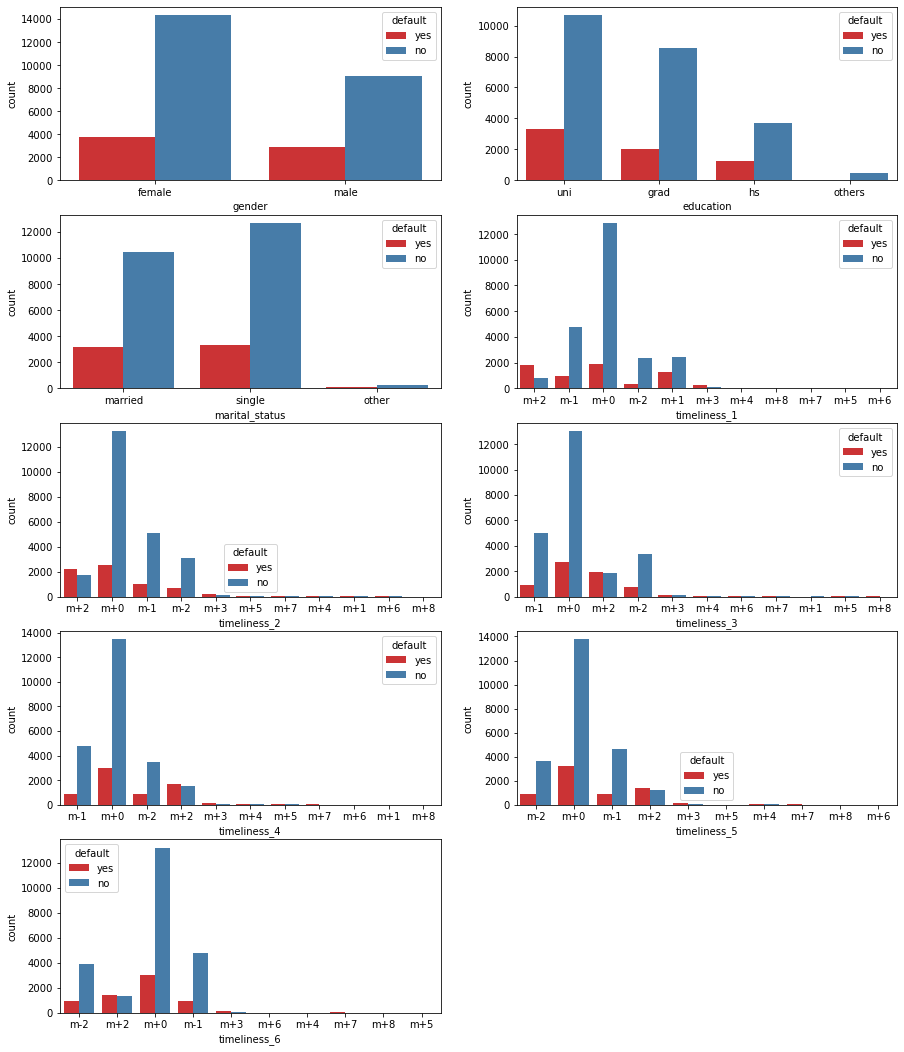

In [24]:
#countplot for categorical variables with respect to default.
plt.figure(figsize=(15,30))
for i,col in enumerate(df.select_dtypes(include='object').columns[0:-1],1):
    plt.subplot(8,2,i)
    sns.countplot(x=col,hue="default", data=df, palette="Set1")
    plt.xlabel(col)
plt.show()

In [25]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot
def create_stacked_bar(col):
    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['default'],columns = df[col], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "default_no"
    list2_name = "default_yes"
    title = f"Default by {col}"
    xlabel = col
    ylabel = "Default Percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=0)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

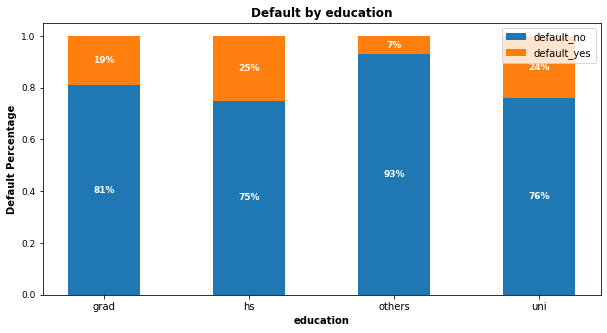

In [26]:
create_stacked_bar('education')

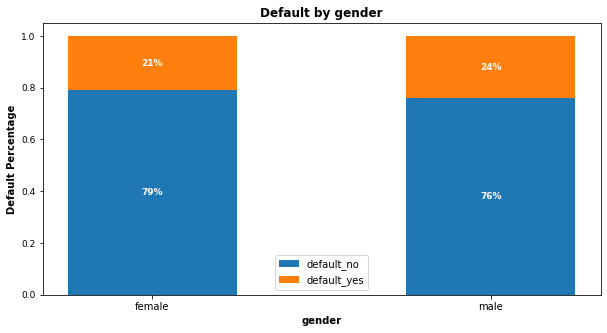

In [27]:
create_stacked_bar('gender')

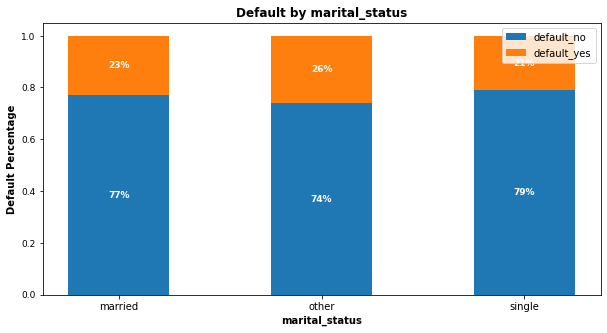

In [28]:
create_stacked_bar('marital_status')

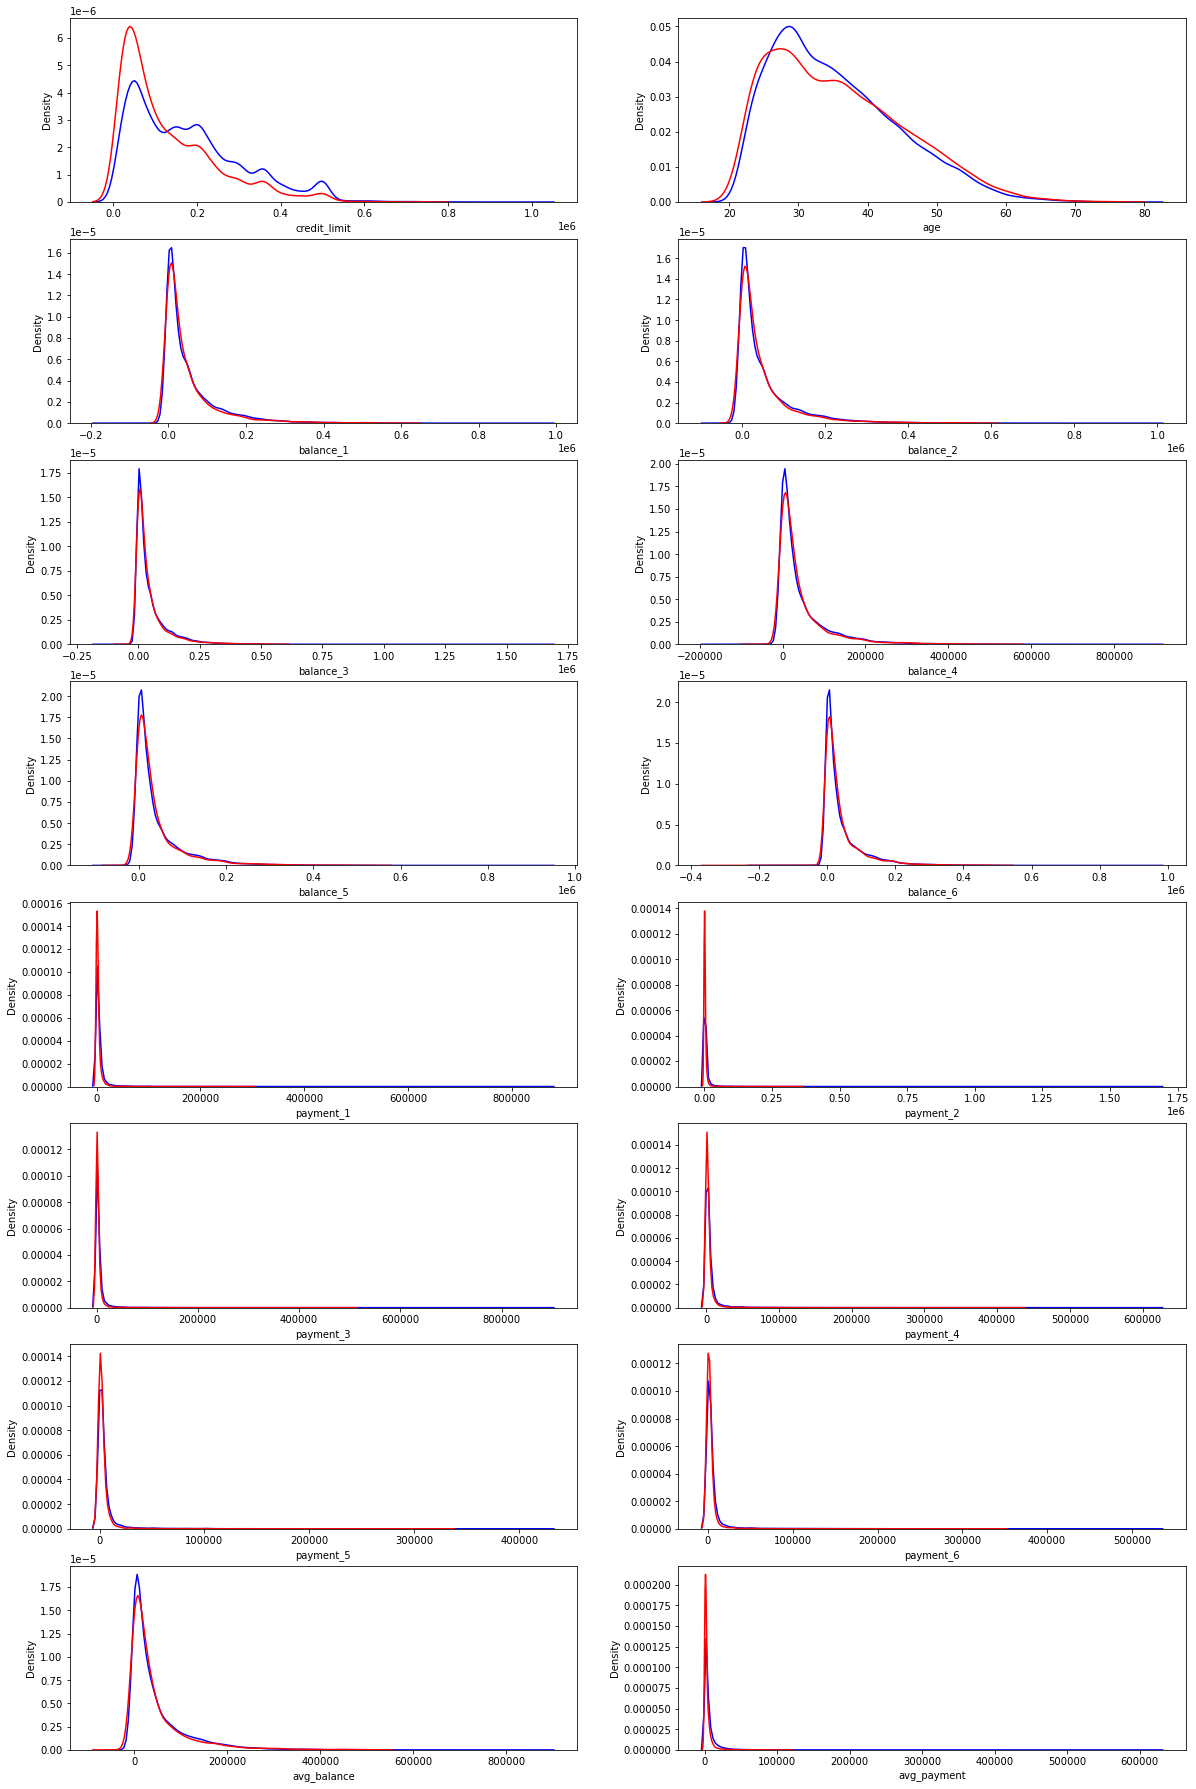

In [29]:
# DISTRIBUTION OF DEFAULT VS CONTINOUS VARIABLE.
dy=df[df['default']=="yes"]
dn=df[df['default']=="no"]
plt.figure(figsize=(20,40))
for i,col in enumerate(df.select_dtypes(np.number).columns,1):
    plt.subplot(10,2,i)
    sns.distplot(dn[col],hist=False,color='b')
    sns.distplot(dy[col],hist=False,color='r')
    plt.xlabel(col)
plt.show()

## HYPOTHESIS TEST ON THE FEATURES:

In [30]:
from scipy import stats

In [31]:
dy=df[df['default']=="yes"]
dn=df[df['default']=="no"]
mvp=[round(stats.mannwhitneyu(dn[i],dy[i])[1],3) for i in df.select_dtypes(np.number).columns]
mvs=[round(stats.mannwhitneyu(dn[i],dy[i])[0],3) for i in df.select_dtypes(np.number).columns]
m=pd.DataFrame(index=df.select_dtypes(np.number).columns,data={"ManWhitneyu Stats":mvs,"ManWhitneyu pvalue":mvp})
m

,ManWhitneyu Stats,ManWhitneyu pvalue
credit_limit,95786286.5,0.000
age,76966879.5,0.373
balance_1,80252445.5,0.000
balance_2,79198493.0,0.007
balance_3,78887405.5,0.028
balance_4,78422386.5,0.148
balance_5,78259960.0,0.235
balance_6,77529951.0,0.989
payment_1,94780733.0,0.000
payment_2,93753756.0,0.000


In [32]:
significant_variable =pd.DataFrame()
for i in df.select_dtypes(include="object").columns:
    table=pd.crosstab(df[i],df['default'])
    test_stat, p, dof, expected_value = stats.chi2_contingency(table)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Dependent'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Independent'})
        significant_variable 
        
significant_variable 

,Feature,Statistical Test,P-Value,Inference
0,gender,Chi-Square Test for Independence,4.944679e-12,Dependent
1,education,Chi-Square Test for Independence,1.495065e-34,Dependent
2,marital_status,Chi-Square Test for Independence,1.512642e-07,Dependent
3,timeliness_1,Chi-Square Test for Independence,0.000000e+00,Dependent
4,timeliness_2,Chi-Square Test for Independence,0.000000e+00,Dependent
5,timeliness_3,Chi-Square Test for Independence,0.000000e+00,Dependent
6,timeliness_4,Chi-Square Test for Independence,0.000000e+00,Dependent
7,timeliness_5,Chi-Square Test for Independence,0.000000e+00,Dependent
8,timeliness_6,Chi-Square Test for Independence,0.000000e+00,Dependent
9,default,Chi-Square Test for Independence,0.000000e+00,Dependent


### CONTINOUS V/S CATEGORICAL
### CREDIT_LIMIT V/S DEFAULT :

In [33]:
# CHECK FOR NORMAL DISTRIBUTION.(SHAPIRO TEST):

# NULL HYPOTHESIS: CREDIT_LIMIT IS NORMALLY DISTRIBUTED.
# ALTERNATE HYPOTHESIS: CREDIT_LIMIT IS  NOT NORMALLY DISTRIBUTED.

stats.shapiro(df['credit_limit'])

# Since pvalue is less than significant level(0.05).
# So, reject the null hypothesis we conclude CREDIT_LIMIT is not normally distributed.

ShapiroResult(statistic=0.9073493480682373, pvalue=0.0)

In [34]:
## NON-PARAMETRIC 

dy=df[df['default']=="yes"]
dn=df[df['default']=="no"]

# NULL HYPOTHESIS: CREDIT_LIMIT and DEFAULT are Independent.
# ALTERNATE HYPOTHESIS: CREDIT_LIMIT and DEFAULT are Dependent.

stats.mannwhitneyu(dy["credit_limit"],dn["credit_limit"])

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude that CREDIT_LIMIT and DEFAULT are Dependent.

MannwhitneyuResult(statistic=59257217.5, pvalue=1.2255485818223303e-189)

## AGE V/S DEFAULT :

In [35]:
# CHECK FOR NORMAL DISTRIBUTION.(SHAPIRO TEST):

# NULL HYPOTHESIS: AGE IS NORMALLY DISTRIBUTED.
# ALTERNATE HYPOTHESIS: AGE IS  NOT NORMALLY DISTRIBUTED.

stats.shapiro(df['age'])

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude AGE is not normally distributed.

ShapiroResult(statistic=0.9499877691268921, pvalue=0.0)

In [36]:
## NON-PARAMETRIC 

dy=df[df['default']=="yes"]
dn=df[df['default']=="no"]

# NULL HYPOTHESIS: AGE and DEFAULT are Independent.
# ALTERNATE HYPOTHESIS: AGE and DEFAULT are Dependent.

stats.mannwhitneyu(dy["age"],dn["age"])

# Since pvalue is GREATER than significant level(0.05).
# So,fail to reject the null hypothesis we conclude that AGE and DEFAULT are Independent.

MannwhitneyuResult(statistic=78076624.5, pvalue=0.3725035434898616)

## BALANCES V/S DEFAULT :

In [37]:
df.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'timeliness_1', 'timeliness_2', 'timeliness_3', 'timeliness_4',
       'timeliness_5', 'timeliness_6', 'balance_1', 'balance_2', 'balance_3',
       'balance_4', 'balance_5', 'balance_6', 'payment_1', 'payment_2',
       'payment_3', 'payment_4', 'payment_5', 'payment_6', 'avg_balance',
       'avg_payment', 'default'],
      dtype='object')

In [38]:
# CHECK FOR NORMAL DISTRIBUTION.(SHAPIRO TEST):

# NULL HYPOTHESIS: BILL_STATEMENT IS NORMALLY DISTRIBUTED.
# ALTERNATE HYPOTHESIS: BILL_STATEMENT IS  NOT NORMALLY DISTRIBUTED.

BILLS=['balance_1', 'balance_2', 'balance_3',
       'balance_4', 'balance_5', 'balance_6']

for i in BILLS:
    print(i,": ",stats.shapiro(df[i]))

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude all BILL_STATEMENT is not normally distributed.

balance_1 :  ShapiroResult(statistic=0.6974822282791138, pvalue=0.0)
balance_2 :  ShapiroResult(statistic=0.6953327059745789, pvalue=0.0)
balance_3 :  ShapiroResult(statistic=0.6818559765815735, pvalue=0.0)
balance_4 :  ShapiroResult(statistic=0.6816972494125366, pvalue=0.0)
balance_5 :  ShapiroResult(statistic=0.6766496896743774, pvalue=0.0)
balance_6 :  ShapiroResult(statistic=0.6759445667266846, pvalue=0.0)


In [39]:
## NON-PARAMETRIC 

dy=df[df['default']=="yes"]
dn=df[df['default']=="no"]

# NULL HYPOTHESIS: BILL_STATEMENT and DEFAULT are Independent.
# ALTERNATE HYPOTHESIS: BILL_STATEMENT and DEFAULT are Dependent.

for i in BILLS:
    print(i,": ",stats.mannwhitneyu(dy[i],dn[i]))


# Since pvalue is GREATER than significant level(0.05).
# So,fail to reject the null hypothesis we conclude that BILL_STATEMENT(SEP) and DEFAULT are Independent.

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude all 'BILL_STATEMENT(AUG)', 'BILL_STATEMENT(JUL)', 'BILL_STATEMENT(JUN)',
# 'BILL_STATEMENT(MAY)','BILL_STATEMENT(APR)' and DEFAULT are Dependent.

balance_1 :  MannwhitneyuResult(statistic=74791058.5, pvalue=1.1510381825298247e-05)
balance_2 :  MannwhitneyuResult(statistic=75845011.0, pvalue=0.007061205045571093)
balance_3 :  MannwhitneyuResult(statistic=76156098.5, pvalue=0.028202701361998515)
balance_4 :  MannwhitneyuResult(statistic=76621117.5, pvalue=0.14776781853794307)
balance_5 :  MannwhitneyuResult(statistic=76783544.0, pvalue=0.23536702261617015)
balance_6 :  MannwhitneyuResult(statistic=77513553.0, pvalue=0.9894808402783662)


## AVG_BALANCE V/S DEFAULT :

In [40]:
# CHECK FOR NORMAL DISTRIBUTION.(SHAPIRO TEST):

# NULL HYPOTHESIS: AVERAGE_BILL_STATEMENT IS NORMALLY DISTRIBUTED.
# ALTERNATE HYPOTHESIS: AVERAGE_BILL_STATEMENT IS  NOT NORMALLY DISTRIBUTED.

stats.shapiro(df['avg_balance'])

# Since pvalue is less than significant level(0.05).
# So, reject the null hypothesis we conclude AVERAGE_BILL_STATEMENT is not normally distributed.

ShapiroResult(statistic=0.695279598236084, pvalue=0.0)

In [41]:
## NON-PARAMETRIC 

dy=df[df['default']=="yes"]
dn=df[df['default']=="no"]

# NULL HYPOTHESIS: AVERAGE_BILL_STATEMENT and DEFAULT are Independent.
# ALTERNATE HYPOTHESIS: AVERAGE_BILL_STATEMENT and DEFAULT are Dependent.

stats.mannwhitneyu(dy['avg_balance'],dn['avg_balance'])

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude that AVERAGE_BILL_STATEMENT and DEFAULT are Dependent.

MannwhitneyuResult(statistic=74628636.0, pvalue=3.3689552028313084e-06)

## PAYMENTS V/S DEFAULT :

In [42]:
df.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'timeliness_1', 'timeliness_2', 'timeliness_3', 'timeliness_4',
       'timeliness_5', 'timeliness_6', 'balance_1', 'balance_2', 'balance_3',
       'balance_4', 'balance_5', 'balance_6', 'payment_1', 'payment_2',
       'payment_3', 'payment_4', 'payment_5', 'payment_6', 'avg_balance',
       'avg_payment', 'default'],
      dtype='object')

In [43]:
# CHECK FOR NORMAL DISTRIBUTION.(SHAPIRO TEST):

# NULL HYPOTHESIS: AMOUNT_PAID IS NORMALLY DISTRIBUTED.
# ALTERNATE HYPOTHESIS: AMOUNT_PAID IS  NOT NORMALLY DISTRIBUTED.

AMOUNT=['payment_1', 'payment_2','payment_3',
        'payment_4', 'payment_5', 'payment_6']

for i in AMOUNT:
    print(i,": ",stats.shapiro(df[i]))

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude all AMOUNT_PAID is not normally distributed.

payment_1 :  ShapiroResult(statistic=0.2652016282081604, pvalue=0.0)
payment_2 :  ShapiroResult(statistic=0.17241019010543823, pvalue=0.0)
payment_3 :  ShapiroResult(statistic=0.2318122386932373, pvalue=0.0)
payment_4 :  ShapiroResult(statistic=0.25600308179855347, pvalue=0.0)
payment_5 :  ShapiroResult(statistic=0.26412832736968994, pvalue=0.0)
payment_6 :  ShapiroResult(statistic=0.251467764377594, pvalue=0.0)


In [44]:
## NON-PARAMETRIC 

dy=df[df['default']=="yes"]
dn=df[df['default']=="no"]

# NULL HYPOTHESIS: BILL_STATEMENT and DEFAULT are Independent.
# ALTERNATE HYPOTHESIS: BILL_STATEMENT and DEFAULT are Dependent.

for i in AMOUNT:
    print(i,": ",stats.mannwhitneyu(dy[i],dn[i]))

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude all  'AMOUNT_PAID(SEP)','AMOUNT_PAID(AUG)', 'AMOUNT_PAID(JUL)',
# 'AMOUNT_PAID(JUNE)','AMOUNT_PAID(MAY)', 'AMOUNT_PAID(APR)' and DEFAULT are Dependent.

payment_1 :  MannwhitneyuResult(statistic=60262771.0, pvalue=4.616659199185981e-170)
payment_2 :  MannwhitneyuResult(statistic=61289748.0, pvalue=9.954975969253173e-151)
payment_3 :  MannwhitneyuResult(statistic=62551544.5, pvalue=8.992708492430757e-129)
payment_4 :  MannwhitneyuResult(statistic=63790208.5, pvalue=7.284694665069206e-109)
payment_5 :  MannwhitneyuResult(statistic=65021456.0, pvalue=1.1248698832662903e-90)
payment_6 :  MannwhitneyuResult(statistic=64517205.0, pvalue=3.1841165363473415e-98)


## AVERAGE_AMOUNT_PAID V/S DEFAULT :

In [45]:
# CHECK FOR NORMAL DISTRIBUTION.(SHAPIRO TEST):

# NULL HYPOTHESIS: AVERAGE_AMOUNT_PAID IS NORMALLY DISTRIBUTED.
# ALTERNATE HYPOTHESIS: AVERAGE_AMOUNT_PAID IS  NOT NORMALLY DISTRIBUTED.

stats.shapiro(df['avg_payment'])

# Since pvalue is less than significant level(0.05).
# So, reject the null hypothesis we conclude AVERAGE_AMOUNT_PAID is not normally distributed.

ShapiroResult(statistic=0.4223654866218567, pvalue=0.0)

In [46]:
## NON-PARAMETRIC 

dy=df[df['default']=="yes"]
dn=df[df['default']=="no"]

# NULL HYPOTHESIS: CREDIT_LIMIT and DEFAULT are Independent.
# ALTERNATE HYPOTHESIS: CREDIT_LIMIT and DEFAULT are Dependent.

stats.mannwhitneyu(dy["avg_payment"],dn["avg_payment"])

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude that AVERAGE_AMOUNT_PAID and DEFAULT are Dependent.

MannwhitneyuResult(statistic=58744020.0, pvalue=7.425613916003274e-200)

### CATEGORICAL V/S CATEGORICAL
### GENDER V/S DEFAULT :

In [47]:
# CHECK FOR DEPENDENCY (CHI-SQUARE TEST)

# NULL HYPOTHESIS: GENDER and DEFAULT are Independent / GENDER has no impact on DEFAULT.
# ALTERNATE HYPOTHESIS: GENDER and DEFAULT are Dependent / GENDER has impact on DEFAULT.

Gstat,Gpv,Gdof,Gev = stats.chi2_contingency(pd.crosstab(df["gender"],df['default']))
print("CHI-SQUARE TEST STATISTICS:",Gstat)
print("CHI-SQUARE PVALUE:",Gpv)
print("CHI-SQUARE DEGREE OF FREEDOM:",Gdof)
print("CHI-SQUARE EXPONENT VALUES:",Gev)

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude that GENDER and DEFAULT are Dependent / GENDER has impact on DEFAULT.

CHI-SQUARE TEST STATISTICS: 47.708796890621116
CHI-SQUARE PVALUE: 4.944678999412026e-12
CHI-SQUARE DEGREE OF FREEDOM: 1
CHI-SQUARE EXPONENT VALUES: [[14105.6256  4006.3744]
 [ 9258.3744  2629.6256]]


## QUALIFICATION V/S DEFAULT :

In [48]:
# CHECK FOR DEPENDENCY (CHI-SQUARE TEST)

# NULL HYPOTHESIS: QUALIFICATION and DEFAULT are Independent / QUALIFICATION has no impact on DEFAULT.
# ALTERNATE HYPOTHESIS: QUALIFICATION and DEFAULT are Dependent / QUALIFICATION has impact on DEFAULT.

Gstat,Gpv,Gdof,Gev = stats.chi2_contingency(pd.crosstab(df["education"],df['default']))
print("CHI-SQUARE TEST STATISTICS:",Gstat)
print("CHI-SQUARE PVALUE:",Gpv)
print("CHI-SQUARE DEGREE OF FREEDOM:",Gdof)
print("CHI-SQUARE EXPONENT VALUES:",Gev)

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude that 
# QUALIFICATION and DEFAULT are Dependent / QUALIFICATION has impact on DEFAULT.

CHI-SQUARE TEST STATISTICS: 160.40995107224546
CHI-SQUARE PVALUE: 1.4950645648106153e-34
CHI-SQUARE DEGREE OF FREEDOM: 3
CHI-SQUARE EXPONENT VALUES: [[ 8243.598   2341.402 ]
 [ 3829.3596  1087.6404]
 [  364.4784   103.5216]
 [10926.564   3103.436 ]]


## MARITAL_STATUS V/S DEFAULT :

In [49]:
# CHECK FOR DEPENDENCY (CHI-SQUARE TEST)

# NULL HYPOTHESIS: MARITAL_STATUS and DEFAULT are Independent / MARITAL_STATUS has no impact on DEFAULT.
# ALTERNATE HYPOTHESIS: MARITAL_STATUS and DEFAULT are Dependent / MARITAL_STATUS has impact on DEFAULT.

Gstat,Gpv,Gdof,Gev = stats.chi2_contingency(pd.crosstab(df["marital_status"],df['default']))
print("CHI-SQUARE TEST STATISTICS:",Gstat)
print("CHI-SQUARE PVALUE:",Gpv)
print("CHI-SQUARE DEGREE OF FREEDOM:",Gdof)
print("CHI-SQUARE EXPONENT VALUES:",Gev)

# Since pvalue is LESS than significant level(0.05).
# So, reject the null hypothesis we conclude that 
# QUALIFICATION and MARITAL_STATUS are Dependent / MARITAL_STATUS has impact on DEFAULT.

CHI-SQUARE TEST STATISTICS: 31.408475800840222
CHI-SQUARE PVALUE: 1.5126419390778658e-07
CHI-SQUARE DEGREE OF FREEDOM: 2
CHI-SQUARE EXPONENT VALUES: [[10637.6292  3021.3708]
 [  251.5524    71.4476]
 [12474.8184  3543.1816]]


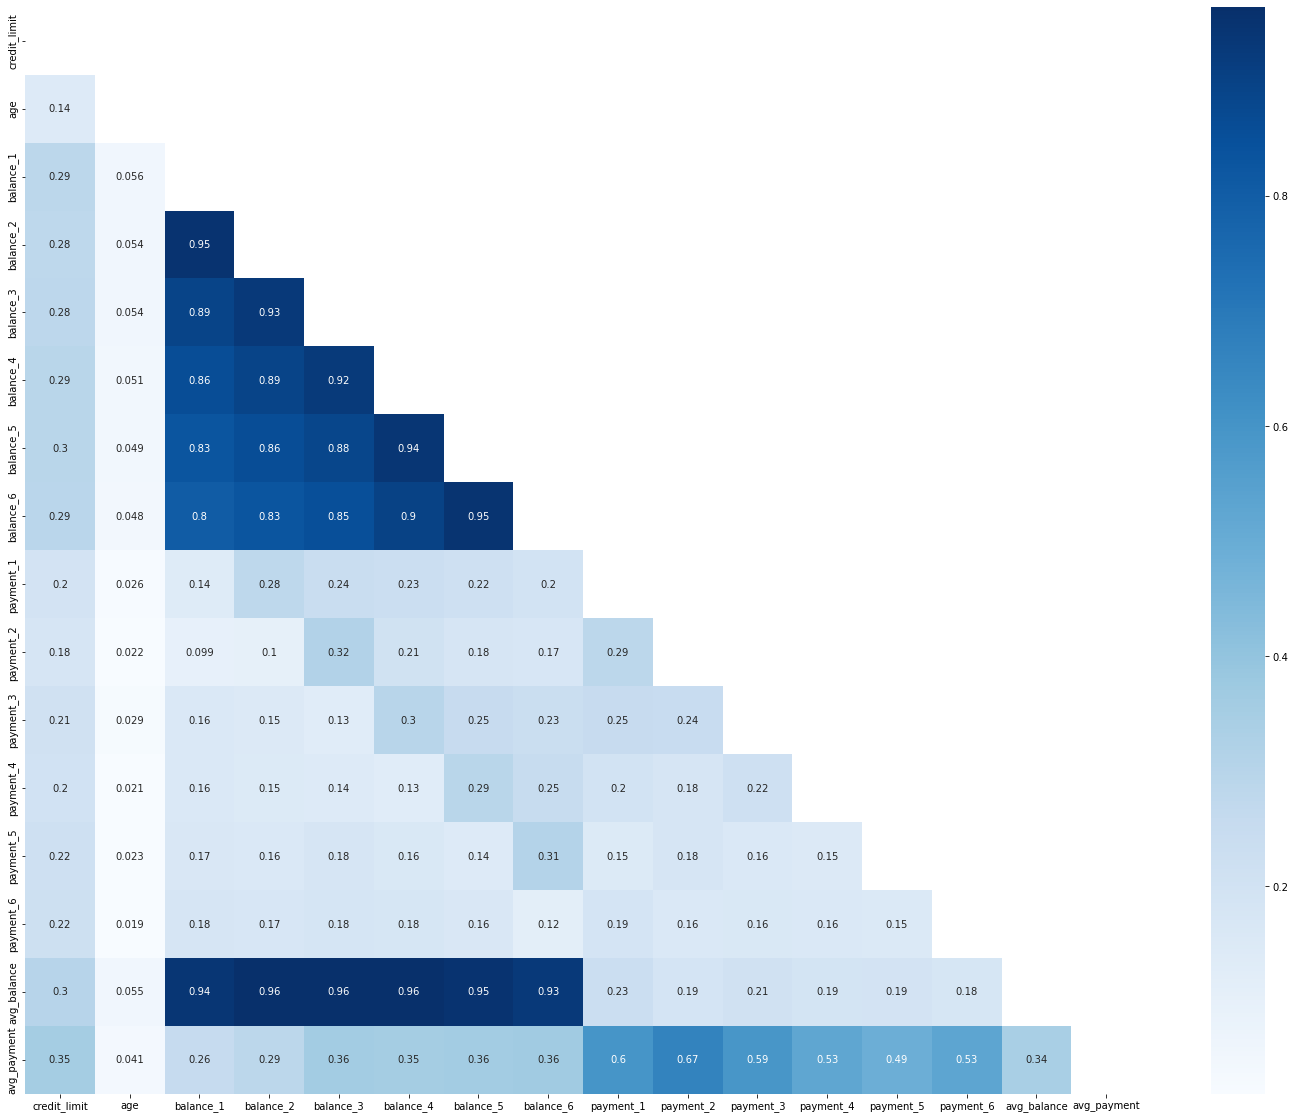

In [50]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues',mask=(np.triu(df.corr())));

## Encoding.

In [51]:
df.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'timeliness_1', 'timeliness_2', 'timeliness_3', 'timeliness_4',
       'timeliness_5', 'timeliness_6', 'balance_1', 'balance_2', 'balance_3',
       'balance_4', 'balance_5', 'balance_6', 'payment_1', 'payment_2',
       'payment_3', 'payment_4', 'payment_5', 'payment_6', 'avg_balance',
       'avg_payment', 'default'],
      dtype='object')

In [52]:
# 'timeliness_1', 'timeliness_2', 'timeliness_3', 'timeliness_4','timeliness_5', 'timeliness_6' 

In [53]:
# History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment
# status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for
# the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months;
# 9 = payment delay for nine months and above. 

# df.replace(to_replace=['m+8', 'm+7', 'm+6', 'm+5', 'm+4', 'm+3', 'm+2', 'm+1', 'm+0', 'm-1', 'm-2'],value=['8', '7', '6', '5', '4', '3', '2', '1', '0', '-1', '-2'],inplace=True)

dd=df.replace({'m+8':8, 'm+7':7, 'm+6':6, 'm+5':5, 'm+4':4, 'm+3':3, 'm+2':2, 'm+1':1, 'm+0':0, 'm-1':-1, 'm-2':-2})

In [54]:
# Encoded dataset is dd.

In [55]:
num=dd.select_dtypes(np.number)
cat=dd.select_dtypes(object)
display(num.sample(10))
display(cat.sample(10))
print('Continuous variables are : \n',num.columns)
print('----------------------------------------------------------------------------')
print('Categorical Columns are : \n',cat.columns)

,credit_limit,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,timeliness_6,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment
10801,50000,36,2,2,7,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0,2400.000000,0.000000
462,290000,26,0,0,0,-1,-1,0,20807,99860,100000,3015,23473,1448,80000,3000,3015,23473,1148,4900,41433.833333,19256.000000
15510,160000,38,0,0,0,0,0,0,25003,23621,24994,15778,9333,7083,2000,5060,5000,1500,0,0,17635.333333,2260.000000
20300,130000,59,-1,-1,-1,-1,-1,0,390,2356,1373,390,2746,390,2356,1373,390,2746,0,1570,1274.166667,1405.833333
20913,20000,26,1,2,2,0,0,2,8476,10187,9885,11398,12208,11869,2000,0,2000,1000,0,1200,10670.500000,1033.333333
3950,120000,30,2,2,2,0,0,2,122246,124010,120459,121749,81046,79608,6000,0,5020,6100,0,2800,108186.333333,3320.000000
29269,120000,26,0,0,0,0,0,0,16068,14775,7982,6289,7319,6958,1134,1163,1000,2000,1000,1000,9898.500000,1216.166667
2207,120000,32,0,0,0,0,0,2,15602,16482,16743,17185,18281,17312,2000,1551,2000,1500,457,7000,16934.166667,2418.000000
21604,110000,25,0,0,0,0,0,0,80374,81652,47291,43857,45684,40994,3000,3000,2173,3000,3500,1538,56642.000000,2701.833333
24193,260000,29,-1,2,2,-2,-1,2,8832,1528,0,0,5987,5837,15,0,0,5987,0,27887,3697.333333,5648.166667


,gender,education,marital_status,default
8901,female,grad,single,no
17845,male,uni,single,no
1639,female,hs,married,no
5693,female,hs,single,no
12828,female,grad,single,no
4548,female,uni,married,no
14811,female,uni,married,no
27569,male,uni,married,yes
8747,male,grad,married,no
1333,male,uni,married,no


Continuous variables are : 
 Index(['credit_limit', 'age', 'timeliness_1', 'timeliness_2', 'timeliness_3',
       'timeliness_4', 'timeliness_5', 'timeliness_6', 'balance_1',
       'balance_2', 'balance_3', 'balance_4', 'balance_5', 'balance_6',
       'payment_1', 'payment_2', 'payment_3', 'payment_4', 'payment_5',
       'payment_6', 'avg_balance', 'avg_payment'],
      dtype='object')
----------------------------------------------------------------------------
Categorical Columns are : 
 Index(['gender', 'education', 'marital_status', 'default'], dtype='object')


In [56]:
# 'gender'(1=male; 0=female) is used for encoding.
dd['gender'].replace(to_replace=['male','female'],value=[1,0],inplace=True)

In [57]:
# 'education'(1=graduate school; 2=university; 3=high school; 4=others) is used for encoding.
dd['education'].replace(to_replace=['grad','uni','hs','others'],value=[1,2,3,4],inplace=True)

In [58]:
# 'marital_status'(1=married; 2=single; 3=other) is used for encoding.
dd['marital_status'].replace(to_replace=['married','single','other'],value=[1,2,3],inplace=True)

In [59]:
# default(yes=1,no=0)
dd['default'].replace({'yes':1,'no':0},inplace=True)

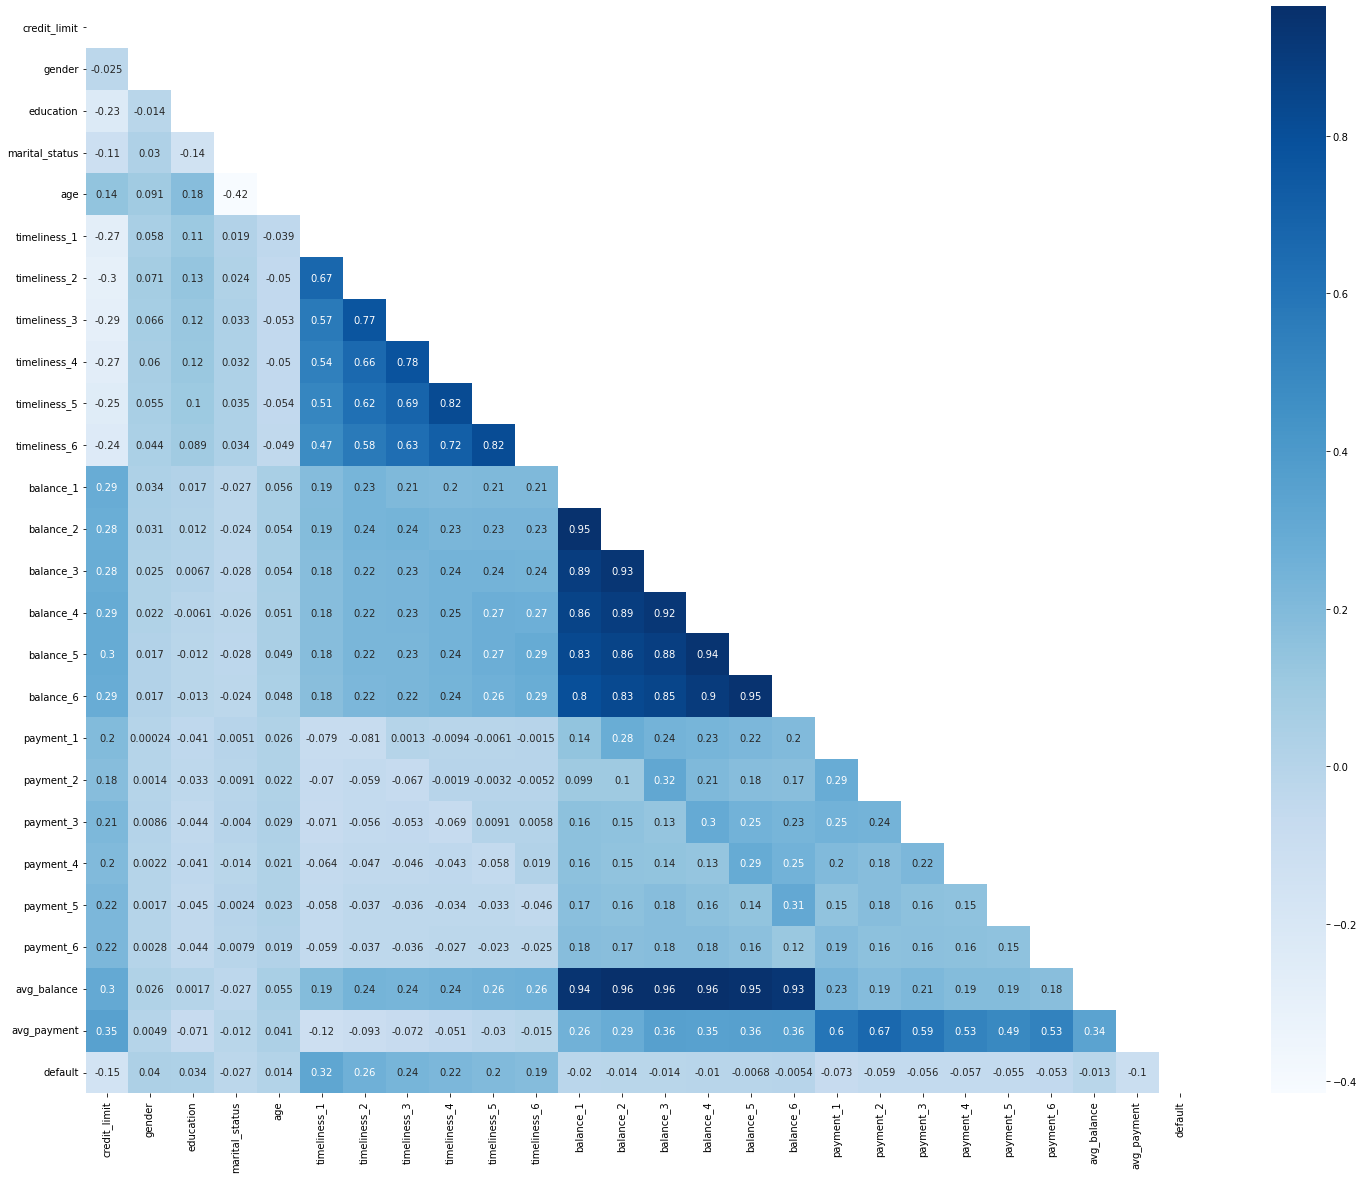

In [60]:
plt.figure(figsize=(25,20))
sns.heatmap(dd.corr(),annot=True,cmap='Blues',mask=(np.triu(dd.corr())));

In [61]:
dd.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'timeliness_1', 'timeliness_2', 'timeliness_3', 'timeliness_4',
       'timeliness_5', 'timeliness_6', 'balance_1', 'balance_2', 'balance_3',
       'balance_4', 'balance_5', 'balance_6', 'payment_1', 'payment_2',
       'payment_3', 'payment_4', 'payment_5', 'payment_6', 'avg_balance',
       'avg_payment', 'default'],
      dtype='object')

In [62]:
dd["timeliness"]=dd['timeliness_1']+dd ['timeliness_2']+dd['timeliness_3']+dd['timeliness_4']+dd['timeliness_5']+dd['timeliness_6']

In [63]:
dd["timeliness"]

0        -2
1         3
2         0
3         0
4        -2
         ..
29995    12
29996     0
29997    -4
29998     8
29999    -1
Name: timeliness, Length: 30000, dtype: int64

In [64]:
def zero(x):
    if x<=0:
        return 0
    else:
        return 1

In [65]:
dd["timeliness"].map(zero)

0        0
1        1
2        0
3        0
4        0
        ..
29995    1
29996    0
29997    0
29998    1
29999    0
Name: timeliness, Length: 30000, dtype: int64

In [66]:
dd[['timeliness_1', 'timeliness_2', 'timeliness_3', 'timeliness_4',
       'timeliness_5', 'timeliness_6','timeliness']].corr()

,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,timeliness_6,timeliness
timeliness_1,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.741345
timeliness_2,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.850428
timeliness_3,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.878080
timeliness_4,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.890987
timeliness_5,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.877502
timeliness_6,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.830272
timeliness,0.741345,0.850428,0.878080,0.890987,0.877502,0.830272,1.000000


In [67]:
# Since,It has high Co-relation with REPAYMENT. We are dropping all REPAYMENT_STATUS:
dd.drop(['timeliness_1', 'timeliness_2', 'timeliness_3', 'timeliness_4',
       'timeliness_5', 'timeliness_6'],axis=1,inplace=True)

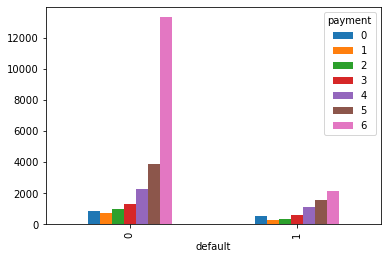

In [68]:
x=dd[['payment_1', 'payment_2','payment_3', 'payment_4', 'payment_5', 'payment_6']]

x.loc[(x['payment_1']!= 0),'payment_1']= 1
x.loc[(x['payment_2']!= 0),'payment_2']= 1
x.loc[(x['payment_3']!= 0),'payment_3']= 1
x.loc[(x['payment_4']!= 0),'payment_4']= 1
x.loc[(x['payment_5']!= 0),'payment_5']= 1
x.loc[(x['payment_6']!= 0),'payment_6']= 1
dd['payment']= x['payment_1']+x['payment_2']+x['payment_3']+x['payment_4']+x['payment_5']+x['payment_6']
pd.crosstab(index=dd['default'], columns=dd["payment"]).plot(kind='bar');

In [69]:
dd[['payment_1', 'payment_2','payment_3', 'payment_4', 'payment_5', 'payment_6',"avg_payment","payment"]].corr()

,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_payment,payment
payment_1,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,0.596438,0.140646
payment_2,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,0.665297,0.108510
payment_3,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740,0.594111,0.129693
payment_4,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834,0.526993,0.134122
payment_5,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896,0.490584,0.133369
payment_6,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000,0.529207,0.120723
avg_payment,0.596438,0.665297,0.594111,0.526993,0.490584,0.529207,1.000000,0.220265
payment,0.140646,0.108510,0.129693,0.134122,0.133369,0.120723,0.220265,1.000000


In [70]:
dd.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'balance_1', 'balance_2', 'balance_3', 'balance_4', 'balance_5',
       'balance_6', 'payment_1', 'payment_2', 'payment_3', 'payment_4',
       'payment_5', 'payment_6', 'avg_balance', 'avg_payment', 'default',
       'timeliness', 'payment'],
      dtype='object')

In [71]:
dd[['balance_1', 'balance_2', 'balance_3','balance_4',
    'balance_5', 'balance_6','avg_balance']].corr()

,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,avg_balance
balance_1,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.940100
balance_2,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.961178
balance_3,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.961958
balance_4,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.964501
balance_5,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.951676
balance_6,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.928720
avg_balance,0.940100,0.961178,0.961958,0.964501,0.951676,0.928720,1.000000


In [72]:
# Since,It has high Co-relation with AVERAGE_BILL_STATEMENT. We are dropping all BILL_STATEMENT:
dd.drop(['balance_1', 'balance_2', 'balance_3','balance_4',
         'balance_5', 'balance_6'],axis=1,inplace=True)

In [73]:
dd.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'payment_1', 'payment_2', 'payment_3', 'payment_4', 'payment_5',
       'payment_6', 'avg_balance', 'avg_payment', 'default', 'timeliness',
       'payment'],
      dtype='object')

In [74]:
X=dd.drop(["default"],axis=1)
y=dd["default"]
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y, test_size=0.3,random_state=42)

## BASE MODEL:

In [75]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xtrain=pd.DataFrame(ss.fit_transform(Xtrain),columns=Xtrain.columns)
Xtest=pd.DataFrame(ss.fit_transform(Xtest),columns=Xtest.columns)

In [76]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(Xtrain,ytrain)

LogisticRegression()

In [77]:
ytrainp=LR.predict(Xtrain)
ytestp=LR.predict(Xtest)
print('LOGISTIC REGRESSION TRAIN:\n',classification_report(ytrain,ytrainp))
print('LOGISTIC REGRESSION TEST:\n',classification_report(ytest,ytestp))

LOGISTIC REGRESSION TRAIN:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88     16324
           1       0.67      0.22      0.33      4676

    accuracy                           0.80     21000
   macro avg       0.74      0.59      0.61     21000
weighted avg       0.78      0.80      0.76     21000

LOGISTIC REGRESSION TEST:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      7040
           1       0.63      0.21      0.32      1960

    accuracy                           0.80      9000
   macro avg       0.72      0.59      0.60      9000
weighted avg       0.77      0.80      0.76      9000



In [78]:
# define a function to plot the ROC curve and print the ROC-AUC score
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    yp_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, yp_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC CURVE FOR CREDIT DEFAULT CLASSIFIER:', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, yp_prob),4)))

    # plot the grid
    plt.grid(True)

LOGISTIC-REGRESSION (BASE)


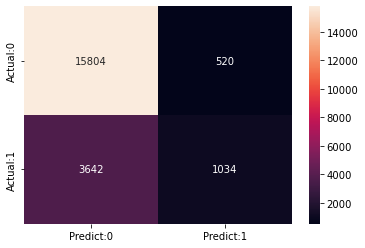

In [79]:
print("LOGISTIC-REGRESSION (BASE)")
cm= confusion_matrix(ytrain,ytrainp)
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

In [80]:
dd.skew()

credit_limit       0.992867
gender             0.424183
education          0.489720
marital_status     0.009525
age                0.732246
payment_1         14.668364
payment_2         30.453817
payment_3         17.216635
payment_4         12.904985
payment_5         11.127417
payment_6         10.640727
avg_balance        2.734744
avg_payment       14.616877
default            1.343504
timeliness         0.692165
payment           -1.447124
dtype: float64

LOGISTIC-REGRESSION (BASE):


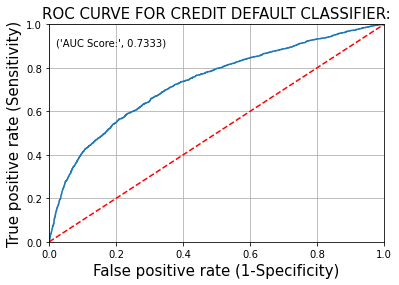

In [76]:
plot_roc(LR, test_data=Xtest)
print("LOGISTIC-REGRESSION (BASE):")

In [77]:
#multicolinearity check:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=dd.drop(["default","payment_1"],axis=1)
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [78]:
vif

,features,VIF
0,credit_limit,3.965219
1,gender,1.690945
2,education,7.224851
3,marital_status,6.278049
4,age,11.517978
5,payment_2,4.372563
6,payment_3,3.108535
7,payment_4,2.612084
8,payment_5,2.412654
9,payment_6,2.929285


## SMOTE OVER SAMPLING:

In [79]:
from imblearn.over_sampling import SMOTE
SM= SMOTE(random_state = 2)
sXtrain,sytrain=SM.fit_resample(Xtrain, ytrain.ravel())
print("Before Over-Samapling:'1' is ",sum(ytrain==1))
print("Before Over-Samapling:'0' is ",sum(ytrain==0))
print("After Over-Samapling:'1' is ",sum(sytrain==1))
print("After Over-Samapling:'0' is ",sum(sytrain==0))
print("Shape of Xtrain before Over sampling is:",Xtrain.shape)
print("Shape of Xtrain after Over sampling is:",sXtrain.shape)
print("Shape of ytrain before Over sampling is:",ytrain.shape)
print("Shape of ytrain after Over sampling is:",sytrain.shape)

Before Over-Samapling:'1' is  4676
Before Over-Samapling:'0' is  16324
After Over-Samapling:'1' is  16324
After Over-Samapling:'0' is  16324
Shape of Xtrain before Over sampling is: (21000, 15)
Shape of Xtrain after Over sampling is: (32648, 15)
Shape of ytrain before Over sampling is: (21000,)
Shape of ytrain after Over sampling is: (32648,)


## FINAL MODEL: (SMOTE)

## XG BOOST:

In [80]:
from xgboost import XGBClassifier
XGB=XGBClassifier(max_depth = 10, gamma = 1)
XG=XGB.fit(sXtrain,sytrain)
ytrainp = XG.predict(sXtrain)
ytestp = XG.predict(Xtest)
print('XGCLASSIFIER TRAIN:\n',classification_report(sytrain,ytrainp))
print('XGCLASSIFIER TEST:\n',classification_report(ytest,ytestp))

XGCLASSIFIER TRAIN:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     16324
           1       1.00      0.98      0.99     16324

    accuracy                           0.99     32648
   macro avg       0.99      0.99      0.99     32648
weighted avg       0.99      0.99      0.99     32648

XGCLASSIFIER TEST:
               precision    recall  f1-score   support

           0       0.93      0.06      0.10      7040
           1       0.22      0.98      0.37      1960

    accuracy                           0.26      9000
   macro avg       0.58      0.52      0.24      9000
weighted avg       0.77      0.26      0.16      9000



XGCLASSIFIER:


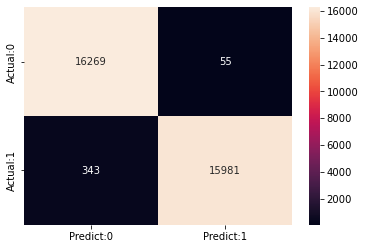

In [81]:
cm= confusion_matrix(sytrain,ytrainp)
print("XGCLASSIFIER:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

XG CLASSIFIER (FINAL)[SMOTE]:


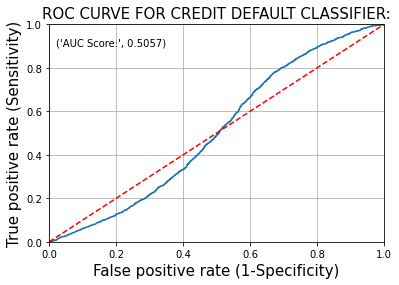

In [82]:
plot_roc(XG, test_data=Xtest)
print("XG CLASSIFIER (FINAL)[SMOTE]:")

## ADA BOOST

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ADB= AdaBoostClassifier(n_estimators = 150, random_state = 42)
AD=ADB.fit(sXtrain,sytrain)
ytrainp = AD.predict(sXtrain)
ytestp = AD.predict(Xtest)
print('ADA BOOST  TRAIN:\n',classification_report(sytrain,ytrainp))
print('ADA BOOST  TEST:\n',classification_report(ytest,ytestp))

ADA BOOST  TRAIN:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81     16324
           1       0.83      0.75      0.79     16324

    accuracy                           0.80     32648
   macro avg       0.80      0.80      0.80     32648
weighted avg       0.80      0.80      0.80     32648

ADA BOOST  TEST:
               precision    recall  f1-score   support

           0       0.85      0.19      0.31      7040
           1       0.23      0.88      0.37      1960

    accuracy                           0.34      9000
   macro avg       0.54      0.54      0.34      9000
weighted avg       0.72      0.34      0.32      9000



ADA BOOST:


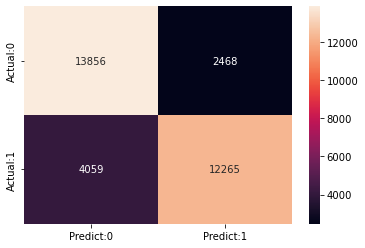

In [84]:
cm= confusion_matrix(sytrain,ytrainp)
print("ADA BOOST:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

ADA BOOST (FINAL)[SMOTE]:


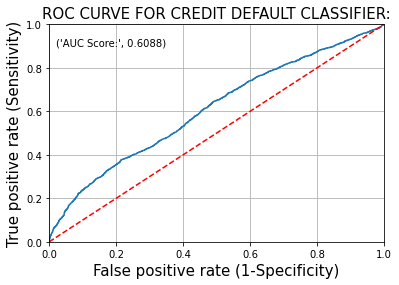

In [85]:
plot_roc(AD, test_data=Xtest)
print("ADA BOOST (FINAL)[SMOTE]:")

## GRADIENT BOOST 

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
GBC= GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 142)
GB=GBC.fit(sXtrain, sytrain)
ytrainp = GB.predict(sXtrain)
ytestp = GB.predict(Xtest)
print('GRADIENT BOOST  TRAIN:\n',classification_report(sytrain,ytrainp))
print('GRADIENT BOOST TEST:\n',classification_report(ytest,ytestp))

GRADIENT BOOST  TRAIN:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     16324
           1       1.00      0.98      0.99     16324

    accuracy                           0.99     32648
   macro avg       0.99      0.99      0.99     32648
weighted avg       0.99      0.99      0.99     32648

GRADIENT BOOST TEST:
               precision    recall  f1-score   support

           0       0.90      0.10      0.18      7040
           1       0.23      0.96      0.37      1960

    accuracy                           0.29      9000
   macro avg       0.56      0.53      0.28      9000
weighted avg       0.75      0.29      0.22      9000



GRADIENT BOOST:


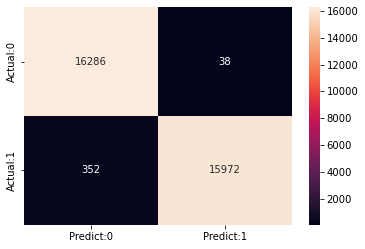

In [87]:
cm= confusion_matrix(sytrain,ytrainp)
print("GRADIENT BOOST:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

GRADIENT BOOST (FINAL)[SMOTE]:


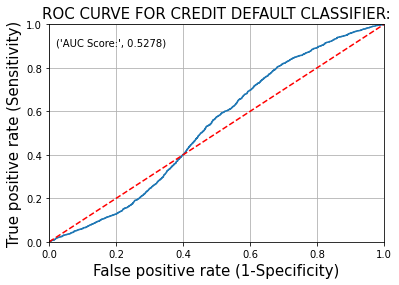

In [88]:
plot_roc(GB, test_data=Xtest)
print("GRADIENT BOOST (FINAL)[SMOTE]:")

## RANDOM FOREST

In [89]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators = 250, random_state = 42)
RF=RFC.fit(sXtrain,sytrain)
ytrainp=RF.predict(sXtrain)
ytestp=RF.predict(Xtest)
print('RANDOM FOREST TRAIN:\n',classification_report(sytrain,ytrainp))
print('RANDOM FOREST TEST:\n',classification_report(ytest,ytestp))

RANDOM FOREST TRAIN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00     16324

    accuracy                           1.00     32648
   macro avg       1.00      1.00      1.00     32648
weighted avg       1.00      1.00      1.00     32648

RANDOM FOREST TEST:
               precision    recall  f1-score   support

           0       0.86      0.43      0.57      7040
           1       0.27      0.75      0.39      1960

    accuracy                           0.50      9000
   macro avg       0.56      0.59      0.48      9000
weighted avg       0.73      0.50      0.53      9000



RANDOM FOREST:


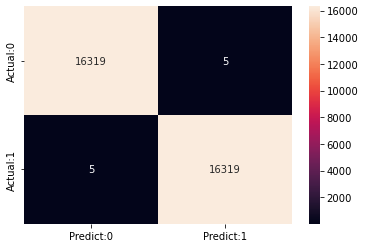

In [90]:
cm= confusion_matrix(sytrain,ytrainp)
print("RANDOM FOREST:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

RANDOM FOREST (FINAL)[SMOTE]:


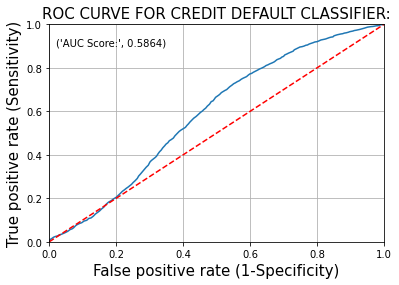

In [91]:
plot_roc(RF, test_data=Xtest)
print("RANDOM FOREST (FINAL)[SMOTE]:")

## KNN CLASSIFIER

In [92]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors = 3)
KN=KNN.fit(sXtrain,sytrain)
ytrainp= KN.predict(sXtrain)
ytestp= KN.predict(Xtest)
print('KNN CLASSIFIER TRAIN:\n',classification_report(sytrain,ytrainp))
print('KNN CLASSIFIER TEST:\n',classification_report(ytest,ytestp))

KNN CLASSIFIER TRAIN:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89     16324
           1       0.85      0.98      0.91     16324

    accuracy                           0.90     32648
   macro avg       0.91      0.90      0.90     32648
weighted avg       0.91      0.90      0.90     32648

KNN CLASSIFIER TEST:
               precision    recall  f1-score   support

           0       0.85      0.70      0.76      7040
           1       0.33      0.55      0.42      1960

    accuracy                           0.66      9000
   macro avg       0.59      0.62      0.59      9000
weighted avg       0.74      0.66      0.69      9000



KNN CLASSIFIER:


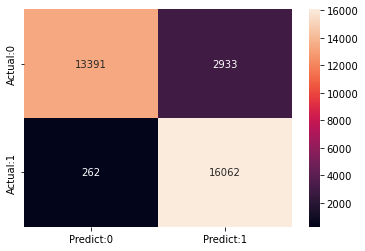

In [93]:
cm= confusion_matrix(sytrain,ytrainp)
print("KNN CLASSIFIER:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

KNN CLASSIFIER (FINAL)[SMOTE]:


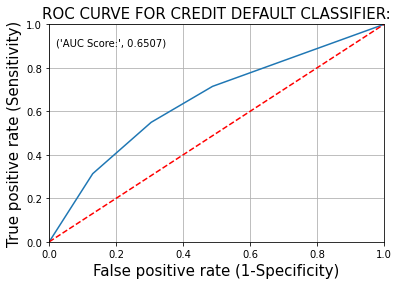

In [94]:
plot_roc(KN, test_data=Xtest)
print("KNN CLASSIFIER (FINAL)[SMOTE]:")

## NAIVE-BAYES CLASSIFIER

In [95]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GN=GNB.fit(sXtrain,sytrain)
ytrainp= GN.predict(sXtrain)
ytestp= GN.predict(Xtest)
print('NAIVE BAYES TRAIN:\n',classification_report(sytrain,ytrainp))
print('NAIVE BAYES TEST:\n',classification_report(ytest,ytestp))

NAIVE BAYES TRAIN:
               precision    recall  f1-score   support

           0       0.73      0.16      0.27     16324
           1       0.53      0.94      0.68     16324

    accuracy                           0.55     32648
   macro avg       0.63      0.55      0.47     32648
weighted avg       0.63      0.55      0.47     32648

NAIVE BAYES TEST:
               precision    recall  f1-score   support

           0       0.90      0.18      0.30      7040
           1       0.24      0.92      0.38      1960

    accuracy                           0.34      9000
   macro avg       0.57      0.55      0.34      9000
weighted avg       0.75      0.34      0.32      9000



NAIVE BAYES:


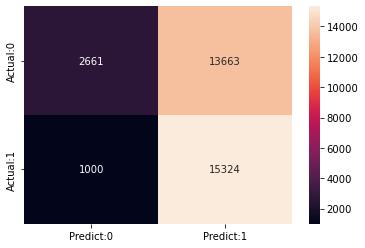

In [96]:
cm= confusion_matrix(sytrain,ytrainp)
print("NAIVE BAYES:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

NAIVE BAYES (FINAL)[SMOTE]:


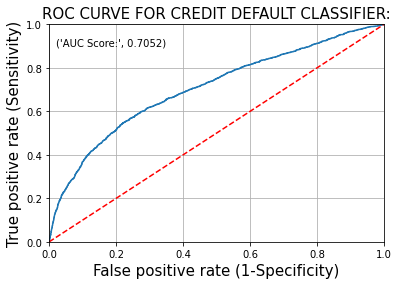

In [97]:
plot_roc(GN, test_data=Xtest)
print("NAIVE BAYES (FINAL)[SMOTE]:")

## DECISION TREE

In [98]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 6),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
decision=DecisionTreeClassifier()
DT=GridSearchCV(estimator = decision, param_grid=tuned_paramaters,cv=3)
DT.fit(sXtrain,sytrain)
ytrainp = DT.predict(sXtrain)
ytestp = DT.predict(Xtest)
print('DECISION-TREE TRAIN:\n',classification_report(sytrain,ytrainp))
print('DECISION-TREE TEST:\n',classification_report(ytest,ytestp))

DECISION-TREE TRAIN:
               precision    recall  f1-score   support

           0       0.65      0.80      0.71     16324
           1       0.74      0.56      0.64     16324

    accuracy                           0.68     32648
   macro avg       0.69      0.68      0.68     32648
weighted avg       0.69      0.68      0.68     32648

DECISION-TREE TEST:
               precision    recall  f1-score   support

           0       0.85      0.54      0.66      7040
           1       0.28      0.64      0.39      1960

    accuracy                           0.56      9000
   macro avg       0.56      0.59      0.53      9000
weighted avg       0.72      0.56      0.60      9000



DECISION-TREE:


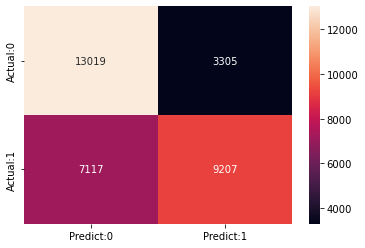

In [100]:
cm= confusion_matrix(sytrain,ytrainp)
print("DECISION-TREE:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

DECISION-TREE (FINAL)[SMOTE]:


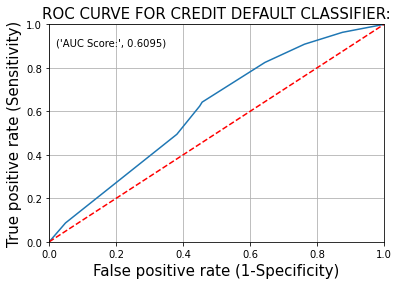

In [101]:
plot_roc(DT, test_data=Xtest)
print("DECISION-TREE (FINAL)[SMOTE]:")

## FINAL MODEL:

## XG BOOST:

In [102]:
from xgboost import XGBClassifier
XGB=XGBClassifier(max_depth = 10, gamma = 1)
XG=XGB.fit(Xtrain,ytrain)
ytrainp = XG.predict(Xtrain)
ytestp = XG.predict(Xtest)
print('XGCLASSIFIER TRAIN:\n',classification_report(ytrain,ytrainp))
print('XGCLASSIFIER TEST:\n',classification_report(ytest,ytestp))

XGCLASSIFIER TRAIN:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     16324
           1       0.99      0.89      0.94      4676

    accuracy                           0.97     21000
   macro avg       0.98      0.94      0.96     21000
weighted avg       0.97      0.97      0.97     21000

XGCLASSIFIER TEST:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      7040
           1       0.47      0.38      0.42      1960

    accuracy                           0.77      9000
   macro avg       0.65      0.63      0.64      9000
weighted avg       0.76      0.77      0.76      9000



XGCLASSIFIER:


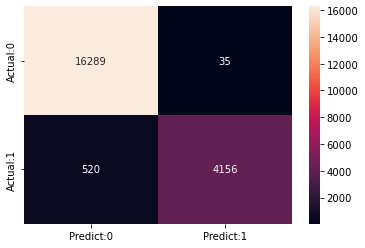

In [103]:
cm= confusion_matrix(ytrain,ytrainp)
print("XGCLASSIFIER:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

XGCLASSIFIER (FINAL):


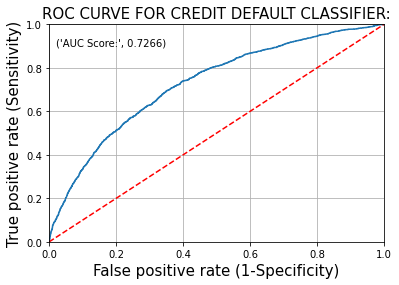

In [104]:
plot_roc(XG, test_data=Xtest)
print("XGCLASSIFIER (FINAL):")

## ADA BOOST

In [105]:
from sklearn.ensemble import AdaBoostClassifier
ADB= AdaBoostClassifier(n_estimators = 150, random_state = 42)
AD=ADB.fit(Xtrain,ytrain)
ytrainp = AD.predict(Xtrain)
ytestp = AD.predict(Xtest)
print('ADA BOOST  TRAIN:\n',classification_report(ytrain,ytrainp))
print('ADA BOOST  TEST:\n',classification_report(ytest,ytestp))

ADA BOOST  TRAIN:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     16324
           1       0.65      0.32      0.43      4676

    accuracy                           0.81     21000
   macro avg       0.74      0.63      0.66     21000
weighted avg       0.79      0.81      0.78     21000

ADA BOOST  TEST:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      7040
           1       0.58      0.31      0.40      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.62      0.64      9000
weighted avg       0.78      0.80      0.78      9000



ADA BOOST:


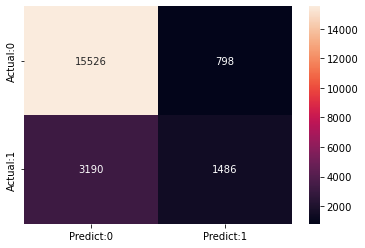

In [106]:
cm= confusion_matrix(ytrain,ytrainp)
print("ADA BOOST:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

ADA BOOST (FINAL):


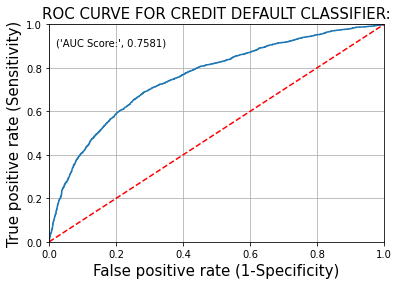

In [107]:
plot_roc(AD, test_data=Xtest)
print("ADA BOOST (FINAL):")

## GRADIENT BOOST 

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
GBC= GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 142)
GB=GBC.fit(Xtrain, ytrain)
ytrainp = GB.predict(Xtrain)
ytestp = GB.predict(Xtest)
print('GRADIENT BOOST  TRAIN:\n',classification_report(ytrain,ytrainp))
print('GRADIENT BOOST TEST:\n',classification_report(ytest,ytestp))

GRADIENT BOOST  TRAIN:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     16324
           1       1.00      0.91      0.95      4676

    accuracy                           0.98     21000
   macro avg       0.99      0.95      0.97     21000
weighted avg       0.98      0.98      0.98     21000

GRADIENT BOOST TEST:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      7040
           1       0.44      0.40      0.42      1960

    accuracy                           0.76      9000
   macro avg       0.64      0.63      0.63      9000
weighted avg       0.75      0.76      0.75      9000



GRADIENT BOOST:


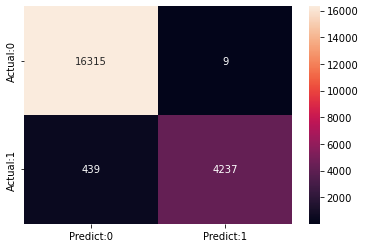

In [109]:
cm= confusion_matrix(ytrain,ytrainp)
print("GRADIENT BOOST:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

GRADIENT BOOST (FINAL):


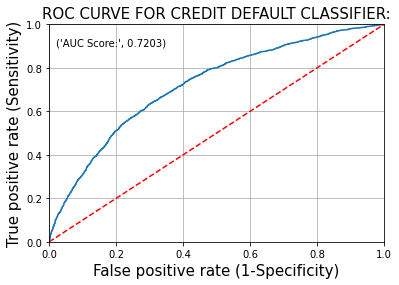

In [110]:
plot_roc(GB, test_data=Xtest)
print("GRADIENT BOOST (FINAL):")

## RANDOM FOREST

In [111]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators = 250, random_state = 42)
RF=RFC.fit(Xtrain,ytrain)
ytrainp=RF.predict(Xtrain)
ytestp=RF.predict(Xtest)
print('RANDOM FOREST TRAIN:\n',classification_report(ytrain,ytrainp))
print('RANDOM FOREST TEST:\n',classification_report(ytest,ytestp))

RANDOM FOREST TRAIN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

RANDOM FOREST TEST:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      7040
           1       0.57      0.33      0.41      1960

    accuracy                           0.80      9000
   macro avg       0.70      0.63      0.65      9000
weighted avg       0.77      0.80      0.78      9000



RANDOM FOREST:


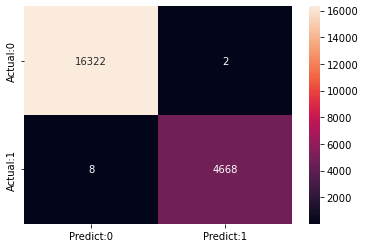

In [112]:
cm= confusion_matrix(ytrain,ytrainp)
print("RANDOM FOREST:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

RANDOM FOREST (FINAL):


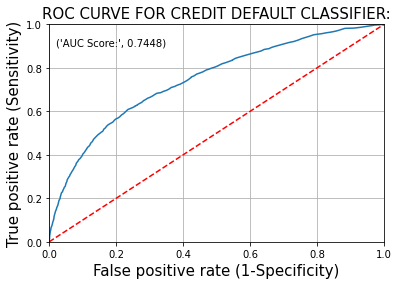

In [113]:
plot_roc(RF, test_data=Xtest)
print("RANDOM FOREST (FINAL):")

## KNN CLASSIFIER

In [114]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors = 3)
KN=KNN.fit(Xtrain,ytrain)
ytrainp= KN.predict(Xtrain)
ytestp= KN.predict(Xtest)
print('KNN CLASSIFIER TRAIN:\n',classification_report(ytrain,ytrainp))
print('KNN CLASSIFIER TEST:\n',classification_report(ytest,ytestp))

KNN CLASSIFIER TRAIN:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     16324
           1       0.75      0.56      0.64      4676

    accuracy                           0.86     21000
   macro avg       0.82      0.75      0.78     21000
weighted avg       0.85      0.86      0.85     21000

KNN CLASSIFIER TEST:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      7040
           1       0.45      0.33      0.38      1960

    accuracy                           0.77      9000
   macro avg       0.64      0.61      0.62      9000
weighted avg       0.74      0.77      0.75      9000



KNN CLASSIFIER:


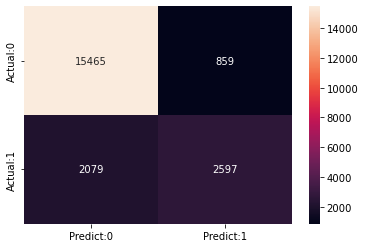

In [115]:
cm= confusion_matrix(ytrain,ytrainp)
print("KNN CLASSIFIER:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

KNN CLASSIFIER (FINAL):


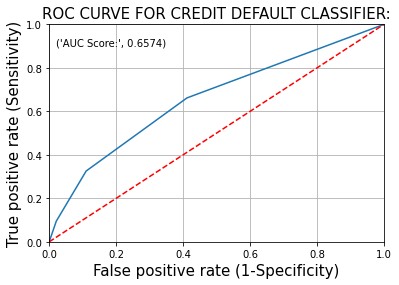

In [116]:
plot_roc(KN, test_data=Xtest)
print("KNN CLASSIFIER (FINAL):")

## NAIVE-BAYES CLASSIFIER

In [117]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GN=GNB.fit(Xtrain,ytrain)
ytrainp= GN.predict(Xtrain)
ytestp= GN.predict(Xtest)
print('NAIVE BAYES TRAIN:\n',classification_report(ytrain,ytrainp))
print('NAIVE BAYES TEST:\n',classification_report(ytest,ytestp))

NAIVE BAYES TRAIN:
               precision    recall  f1-score   support

           0       0.89      0.22      0.35     16324
           1       0.25      0.91      0.39      4676

    accuracy                           0.37     21000
   macro avg       0.57      0.56      0.37     21000
weighted avg       0.75      0.37      0.36     21000

NAIVE BAYES TEST:
               precision    recall  f1-score   support

           0       0.89      0.24      0.38      7040
           1       0.25      0.90      0.39      1960

    accuracy                           0.38      9000
   macro avg       0.57      0.57      0.38      9000
weighted avg       0.75      0.38      0.38      9000



NAIVE BAYES:


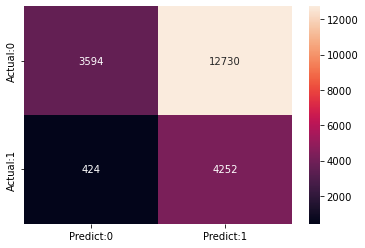

In [118]:
cm= confusion_matrix(ytrain,ytrainp)
print("NAIVE BAYES:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

NAIVE BAYES (FINAL):


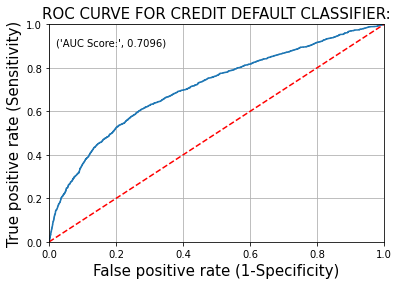

In [119]:
plot_roc(GN, test_data=Xtest)
print("NAIVE BAYES (FINAL):")

## DECISION TREE

In [120]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 6),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
decision=DecisionTreeClassifier()
DT=GridSearchCV(estimator = decision, param_grid=tuned_paramaters,cv=3)
DT.fit(Xtrain,ytrain)
ytrainp = DT.predict(Xtrain)
ytestp = DT.predict(Xtest)
print('DECISION-TREE TRAIN:\n',classification_report(ytrain,ytrainp))
print('DECISION-TREE TEST:\n',classification_report(ytest,ytestp))

DECISION-TREE TRAIN:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87     16324
           1       0.00      0.00      0.00      4676

    accuracy                           0.78     21000
   macro avg       0.39      0.50      0.44     21000
weighted avg       0.60      0.78      0.68     21000

DECISION-TREE TEST:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



DECISION-TREE:


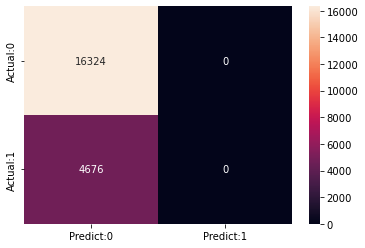

In [122]:
cm= confusion_matrix(ytrain,ytrainp)
print("DECISION-TREE:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

DECISION-TREE (FINAL):


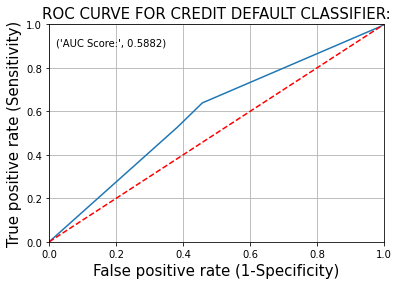

In [123]:
plot_roc(DT, test_data=Xtest)
print("DECISION-TREE (FINAL):")

In [124]:
#multicolinearity check:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=dd.iloc[:,:]
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [125]:
vif

,features,VIF
0,credit_limit,3.965220
1,gender,1.691801
2,education,7.236083
3,marital_status,6.383081
4,age,11.916380
5,payment_1,inf
6,payment_2,inf
7,payment_3,inf
8,payment_4,inf
9,payment_5,inf


In [130]:
from mlxtend.classifier import StackingClassifier
stack=StackingClassifier(classifiers=[RF,XG,AD],meta_classifier=LR)
ST=stack.fit(Xtrain,ytrain)
ytrainp = ST.predict(Xtrain)
ytestp = ST.predict(Xtest)
print("STACK TRAIN :\n",classification_report(ytrain,ytrainp))  
print("STACK TEST  :\n",classification_report(ytest,ytestp))

STACK TRAIN :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

STACK TEST  :
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      7040
           1       0.57      0.33      0.41      1960

    accuracy                           0.80      9000
   macro avg       0.70      0.63      0.65      9000
weighted avg       0.77      0.80      0.78      9000



In [128]:
model_1=RandomForestClassifier(random_state=1)
model_2=XGBClassifier(random_state=10)
model_3=KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
last=LogisticRegression()

In [129]:
from mlxtend.classifier import StackingClassifier
stack=StackingClassifier(classifiers=[model_1,model_2,model_3],meta_classifier=last)
stack_model=stack.fit(Xtrain, ytrain)
ytrainp = stack_model.predict(Xtrain)
ytestp =stack_model.predict(Xtest)
print("STACK TRAIN :\n",classification_report(ytrain,ytrainp))  
print("STACK TEST  :\n",classification_report(ytest,ytestp))

STACK TRAIN :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

STACK TEST  :
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      7040
           1       0.57      0.31      0.40      1960

    accuracy                           0.80      9000
   macro avg       0.70      0.62      0.64      9000
weighted avg       0.77      0.80      0.77      9000

